___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">DA & DVwPY</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Exploratory Data Analysis (EDA) Project</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">AutoScout Car Price Prediction EDA</p>



## Introduction
Welcome to "***AutoScout Exploratory Data Analysis (EDA) Project***". This is the project of completing ***Data Analysis & Data Visualization*** Courses and a successful hand-over is mandatory for getting certification for both courses. **Auto Scout** data used in this project scraped from the Website of an online car trading company in 2022, and contains many features of 13 different car makes including 594 models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using a variety of Python libraries, such as Numpy, Pandas, Matplotlib, Seaborn, Scipy, and then you will get a clean dataset for your analysis and pretictive modelling in Machine Learning Path. So you will have the chance to use all the skills you have already learned in the Data Analysis and Visualization courses.

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to ``'Data Cleaning'``. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to ``'Filling Data'``, in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation, Encoding, is done as well.
* **The third part** is related to ``'Handling Outliers of Data'`` via Visualization libraries. So, some insights will be extracted.

**``SPECIAL NOTE:``**  However, you are ``free to create your own style``. You do ``NOT`` have to stick to the steps above. Nevertheless, we, the DA & DV instructors, recommend you study each part separately to create a source notebook for your further studies. 

In order to build your Portfolio in terms of the GitHub account, you need to push your solution file up to your own repository.

Please after solving the task, commit your notebook to GitHub and submit its link to LMS page where the project is settled down.

**BE NOTED:** Please ``DO NOT FORGET`` to click the submit button.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)



# PART- 3 `( Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv("filled_data.csv")

In [3]:
df.shape

(28630, 25)

In [4]:
df.head(5).T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
price,16950.000,80900.000,69900.000,46990.000,16800.000
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5.000,4.000,5.000,5.000,5.000
mileage,120200.000,5000.000,18900.000,18995.000,197000.000
first_registration,2016.000,2022.000,2020.000,2020.000,2015.000
gearbox,Manual,Automatic,Automatic,Automatic,Automatic
fuel_type,Diesel,Hybrit,Benzine,Benzine,Diesel
seller,Dealer,Dealer,Dealer,Dealer,Dealer


In [5]:
df.isnull().sum()

make_model             0
price                  0
body_type              0
type                   0
doors                  0
mileage                0
first_registration     0
gearbox                0
fuel_type              0
seller                 0
seats                  0
power                  0
engine_size            0
gears                  0
co2_emissions          0
drivetrain             0
cylinders              0
comfort_convenience    0
entertainment_media    0
safety_security        0
extras                 0
upholstery             0
previous_owner         0
avg_consumption        0
age                    0
dtype: int64

In [6]:
df.isnull().sum()*100 / df.shape[0] 
## percentage of null values

make_model            0.000
price                 0.000
body_type             0.000
type                  0.000
doors                 0.000
mileage               0.000
first_registration    0.000
gearbox               0.000
fuel_type             0.000
seller                0.000
seats                 0.000
power                 0.000
engine_size           0.000
gears                 0.000
co2_emissions         0.000
drivetrain            0.000
cylinders             0.000
comfort_convenience   0.000
entertainment_media   0.000
safety_security       0.000
extras                0.000
upholstery            0.000
previous_owner        0.000
avg_consumption       0.000
age                   0.000
dtype: float64

In [7]:
# columns with data type object
object_cols = df.select_dtypes('O').columns
object_cols

Index(['make_model', 'body_type', 'type', 'gearbox', 'fuel_type', 'seller',
       'co2_emissions', 'drivetrain', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'upholstery'],
      dtype='object')

In [8]:
# columns with data type numerical
numeric_cols = df.select_dtypes('number').columns
numeric_cols

Index(['price', 'doors', 'mileage', 'first_registration', 'seats', 'power',
       'engine_size', 'gears', 'cylinders', 'previous_owner',
       'avg_consumption', 'age'],
      dtype='object')

In [9]:
def information(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [10]:
def detect_outliers_numeric(df, col_name, tukey=1.5):

    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
       
    lower_limit = q1 - (tukey*IQR)               
    upper_limit = q3 + (tukey*IQR)
    outlier_count = ((df[col_name]<lower_limit) | (df[col_name]>upper_limit)).sum()
 
    return lower_limit, upper_limit, outlier_count

In [11]:
# Select Column Name iqr=3
def get_outliers_cols(df, columns, tukey=3):
    out_cols = []
    for col in columns:
        lower, upper, count = detect_outliers_numeric(df, col, tukey)
        print(f"{count:<5}:outlier-> {col:<25}lower: {lower:<10.2f}, upper: {upper:<10.2f}")
        out_cols.append(col) if count else _    
        
    return out_cols 

In [12]:
def limits(df, column, positive=False):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    
    upper_lim= Q3+1.5*IQR
    
    if positive:
        if Q1-1.5*IQR > 0:
            lower_lim = Q1-1.5*IQR
        else:
            lower_lim = 0
    else:
        lower_lim= Q1-1.5*IQR
    
    
    print("Lower Limit:",lower_lim) 
    print("Upper limit:", upper_lim)

In [13]:
# Counting of Outliers
'''By default "show" parameter is False. If choosen as True, the outliers will be shown '''
def outliers(df, column, show=False, positive=False):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    
    upper_lim= Q3+1.5*IQR
    
    if positive:
        if Q1-1.5*IQR > 0:
            lower_lim = Q1-1.5*IQR
        else:
            lower_lim = 0
    else:
        lower_lim= Q1-1.5*IQR
        
    
    print("Num of Lower Outliers:",(df[column]<lower_lim).sum())
    print("Num of Upper Outliers:",(df[column]>upper_lim).sum())
    
    if show:
        return df[(df[column]<lower_lim) | (df[column]>upper_lim)]
    else:
        return None

In [14]:
outlier_cols = get_outliers_cols(df, numeric_cols, tukey=3)
outlier_cols

640  :outlier-> price                    lower: -36010.00 , upper: 75990.00  
0    :outlier-> doors                    lower: -3.00     , upper: 11.00     
57   :outlier-> mileage                  lower: -238842.50, upper: 365800.00 
972  :outlier-> first_registration       lower: 1996.00   , upper: 2038.00   
46   :outlier-> seats                    lower: 1.00      , upper: 8.00      
960  :outlier-> power                    lower: -119.00   , upper: 413.00    
687  :outlier-> engine_size              lower: -752.00   , upper: 4036.00   
1728 :outlier-> gears                    lower: 2.00      , upper: 9.00      
8832 :outlier-> cylinders                lower: 4.00      , upper: 4.00      
96   :outlier-> previous_owner           lower: -2.00     , upper: 5.00      
129  :outlier-> avg_consumption          lower: -1.70     , upper: 13.00     
972  :outlier-> age                      lower: -16.00    , upper: 26.00     


['price',
 'mileage',
 'first_registration',
 'seats',
 'power',
 'engine_size',
 'gears',
 'cylinders',
 'previous_owner',
 'avg_consumption',
 'age']

### Make - Model


In [15]:
information("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  611
--------------------------------
Renault Megane              863
SEAT Leon                   787
Volvo V40                   740
Dacia Sandero               730
Hyundai i30                 706
Volvo C70                   692
Opel Astra                  675
Ford Mustang                663
Peugeot 308                 537
Ford Focus                  495
Nissan Qashqai              490
SEAT Ibiza                  442
Fiat 500                    440
Fiat Tipo                   430
Renault Clio                417
Ford Fiesta                 400
Nissan Micra                390
Fiat 500X                   376
Skoda Octavia               371
Opel Corsa                  366
Volvo XC60                  364
Dacia Duster                349
Toyota Yaris                332
Volvo V60                   309
Opel Insignia               290
Peugeot 208                 262
Skoda F

In [16]:
df.make_model.describe().T

count              28630
unique               611
top       Renault Megane
freq                 863
Name: make_model, dtype: object

### Doors 

In [17]:
information("doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    17840
2.000     5523
4.000     3001
3.000     2259
6.000        5
1.000        2
Name: doors, dtype: int64


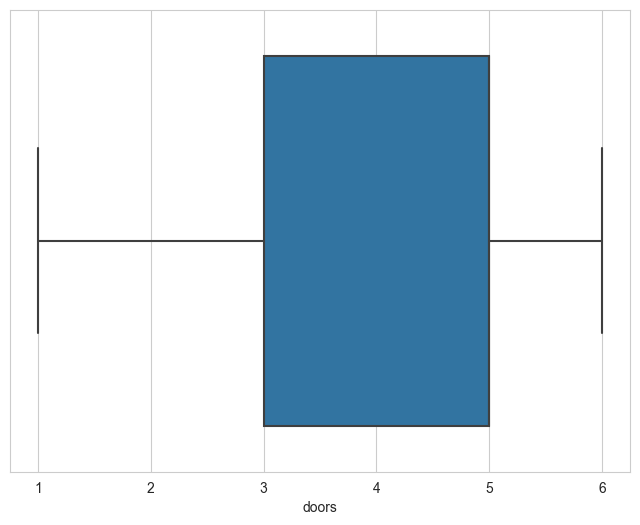

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="doors",data=df)
plt.show()

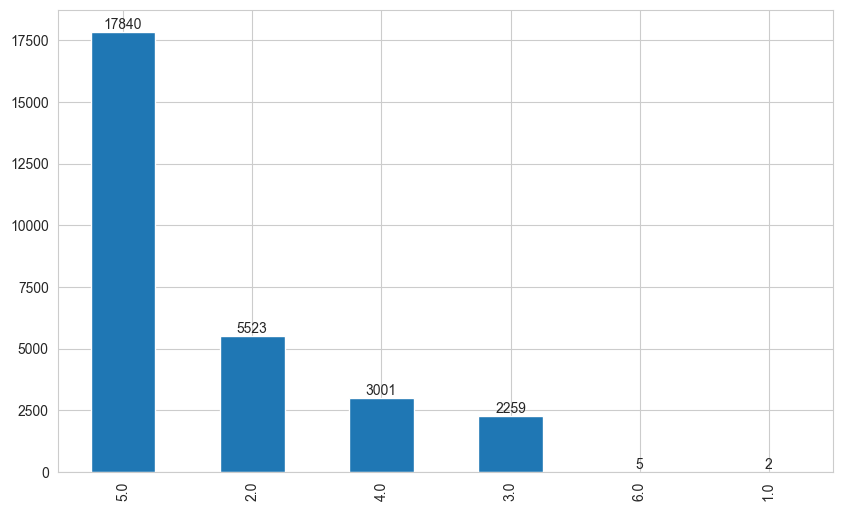

In [19]:
fig, ax = plt.subplots()

df.doors.value_counts().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [20]:
lower, upper, count = detect_outliers_numeric(df, "doors", tukey=1.5)
lower, upper, count

(0.0, 8.0, 0)

In [21]:
df[(df['doors']<lower)|(df['doors']>upper)]['doors'].value_counts()

Series([], Name: doors, dtype: int64)

### Mileage 

In [22]:
information("mileage")

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  14183
--------------------------------
10.000        586
1.000         173
50.000        133
100.000       119
5000.000      118
             ... 
141589.000      1
59821.000       1
123500.000      1
29781.000       1
230047.000      1
Name: mileage, Length: 14183, dtype: int64


In [23]:
lower, upper, count = detect_outliers_numeric(df, "mileage", tukey=1.5)
lower, upper, count

(-109276.25, 236233.75, 671)

In [24]:
df.loc[df.mileage <0]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,previous_owner,avg_consumption,age


In [25]:
df.mileage.describe().T

count     28630.000
mean      72624.507
std       67628.616
min           0.000
25%       20290.000
50%       57491.500
75%      106667.500
max     1440000.000
Name: mileage, dtype: float64

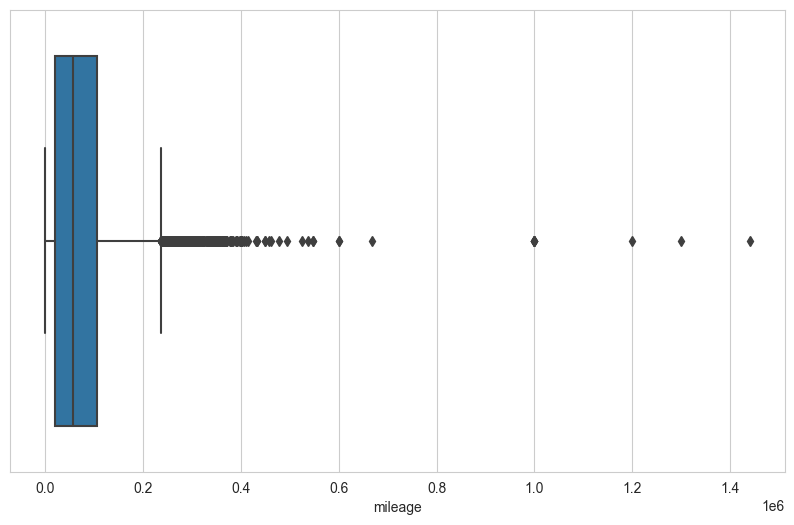

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x="mileage",data=df)
plt.show()

In [27]:
df.loc[df.mileage >600000]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,previous_owner,avg_consumption,age
3397,Opel Kadett,900.000,Coupe,Used,2.000,999999.000,1968.000,Manual,Benzine,Dealer,4.000,60.000,1100.000,5.000,0,Rear,4.000,Leather steering wheel,Digital radio,Alarm system,Sport package,Cloth,1.000,0.000,54.000
7684,Peugeot 404,10000.000,Convertible,Used,2.000,1000000.000,1968.000,Manual,Benzine,Dealer,4.000,88.000,1608.000,4.000,0,Rear,4.000,"Air conditioning, Automatic climate control, E...","Bluetooth, USB",Isofix,Alloy wheels,Cloth,1.000,5.400,54.000
10009,Fiat,159000.000,Convertible,Used,4.000,999999.000,1933.000,Manual,Benzine,Dealer,2.000,52.000,2518.000,4.000,0,Rear,4.000,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, CD pla...","ABS, Adaptive headlights, Central door lock, D...","Alloy wheels, Automatically dimming interior m...",Leather,1.000,6.600,89.000
12169,SEAT Ibiza,10200.000,Compact,Used,5.000,1199900.000,2018.000,Manual,Diesel,Dealer,5.000,95.000,1598.000,5.000,0,Front,4.000,"Air conditioning, Cruise control, Electrical s...","Bluetooth, On-board computer, USB","ABS, Central door lock, Driver-side airbag, Fo...",Alloy wheels,Cloth,1.000,3.700,4.000
13153,SEAT Altea XL,3400.000,Station wagon,Used,5.000,667128.000,2010.000,Manual,Diesel,Dealer,5.000,105.000,1.000,6.000,0,Front,4.000,Air conditioning,"CD player, MP3, On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (16""), Roof rack",Cloth,2.000,5.400,12.000
17324,Toyota Celica,4500.000,Coupe,Used,3.000,1300000.000,1986.000,Manual,Benzine,Private seller,4.000,124.000,1998.000,5.000,0,Front,4.000,"Air conditioning, Automatic climate control, E...",Radio,"ABS, Central door lock, Driver-side airbag, Pa...",Sport seats,Cloth,2.000,0.000,36.000
18873,Nissan Micra,14400.000,Compact,Used,5.000,1440000.000,2019.000,Manual,Benzine,Dealer,5.000,101.000,999.000,5.000,0,Front,3.000,"Cruise control, Multi-function steering wheel,...","Bluetooth, USB","ABS, Fog lights, Isofix, Power steering, Side ...",Alloy wheels,Cloth,1.000,4.600,3.000
21344,Ford Mustang,37990.000,Convertible,Used,2.000,999999.000,1966.000,Manual,Benzine,Private seller,4.000,220.000,5000.000,4.000,0,Rear,8.000,"Air conditioning, Automatic climate control, E...","Android Auto, Apple CarPlay, Bluetooth, CD pla...","ABS, Adaptive Cruise Control, Alarm system, Bi...",Alloy wheels,Cloth,2.000,12.100,56.000
22889,Ford Fiesta,9990.000,Sedan,Used,3.000,1000001.000,2018.000,Manual,Benzine,Dealer,5.000,71.000,1084.000,5.000,114,Front,3.000,"Air conditioning, Electrical side mirrors, Ele...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Central door lock, Central door lock with...","All season tyres, E10-enabled, Emergency tyre ...",Cloth,1.000,5.100,4.000
28463,Volvo S70,1345.000,Sedan,Used,4.000,600001.000,2000.000,Manual,Diesel,Dealer,5.000,140.000,2461.000,5.000,168,Front,5.000,"Air conditioning, Armrest, Automatic climate c...",CD player,"ABS, Central door lock, Central door lock with...","Alloy wheels, Trailer hitch",Leather,2.000,6.300,22.000


In [28]:
df = df[~df['mileage'].isin([1000000, 999999, 1199900, 667128, 1440000, 1000001, 600001])]

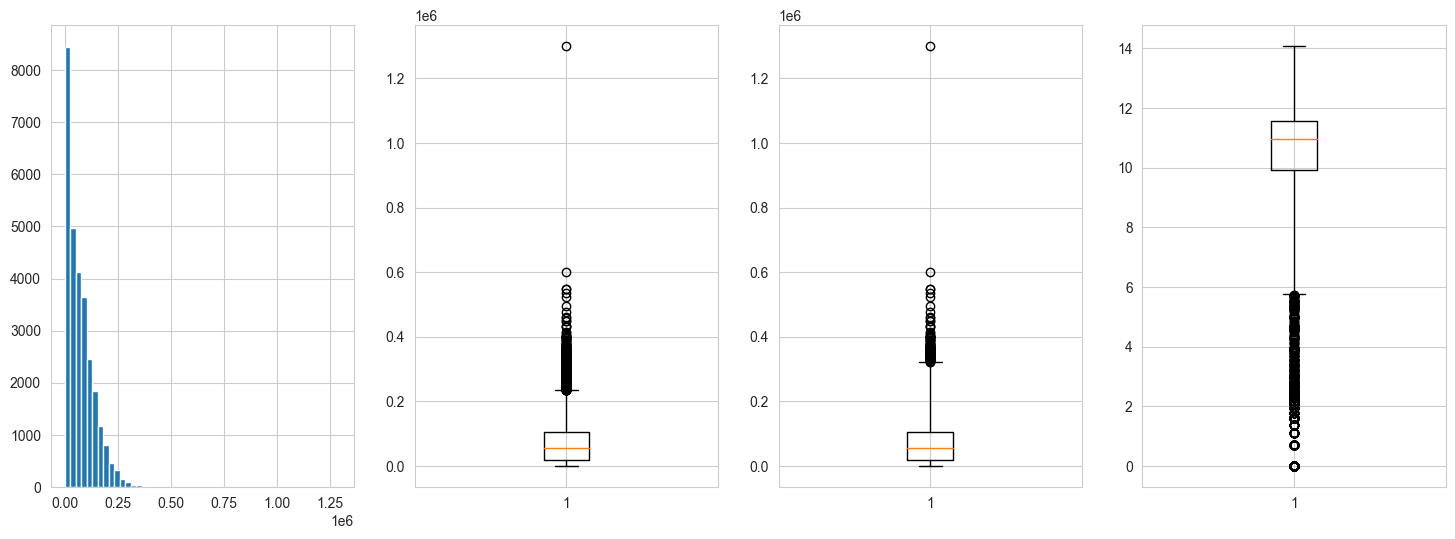

In [29]:
plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.mileage)

plt.subplot(143)
plt.boxplot(df.mileage, whis=2.5)

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis=2.5)

plt.show()

In [30]:
df[(df['mileage']<lower)|(df['mileage']>upper)]['mileage'].value_counts()

240000.000     18
250000.000     15
249000.000      9
242000.000      8
306504.000      8
237737.000      8
260000.000      8
244000.000      8
257000.000      8
350000.000      7
255000.000      6
270000.000      6
258000.000      6
245000.000      6
237000.000      5
239000.000      5
248000.000      5
251000.000      5
280000.000      5
265000.000      5
290000.000      5
269000.000      4
289000.000      4
241000.000      4
336150.000      4
339000.000      4
272000.000      4
238000.000      4
263000.000      3
279000.000      3
300000.000      3
262000.000      3
243000.000      3
298000.000      3
283000.000      3
305000.000      3
295000.000      2
312332.000      2
258455.000      2
243034.000      2
261873.000      2
279490.000      2
259990.000      2
251251.000      2
261750.000      2
293000.000      2
251386.000      2
324296.000      2
266147.000      2
273458.000      2
253800.000      2
295654.000      2
275160.000      2
299911.000      2
297000.000      2
334180.000

In [31]:
df.mileage.describe()

count     28621.000
mean      72336.138
std       65520.524
min           0.000
25%       20271.000
50%       57430.000
75%      106553.000
max     1300000.000
Name: mileage, dtype: float64

In [32]:
limits(df, "mileage",positive = False)

Lower Limit: -109152.0
Upper limit: 235976.0


### First Registration

In [33]:
information("first_registration")

column name    :  first_registration
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
--------------------------------
2019.000    3666
2018.000    3490
2022.000    3088
2021.000    2870
2020.000    2473
2017.000    2426
2016.000    1486
2015.000    1237
2014.000     936
2013.000     703
2012.000     655
2011.000     642
2010.000     558
2007.000     492
2008.000     441
2009.000     424
2006.000     395
2005.000     287
2004.000     247
2003.000     211
2001.000     191
2002.000     187
2000.000     159
1999.000     144
1998.000      91
1997.000      81
1994.000      80
1995.000      78
1996.000      71
1991.000      62
1992.000      60
1993.000      55
1990.000      54
1966.000      40
1967.000      34
1988.000      33
1965.000      32
1973.000      29
1972.000      29
1987.000      26
1968.000      25
1978.000      23
1986.000      22
1989.000      20
1970.000      19
1971.000      18
1985.000      18
1969.000      17
1979.000      17

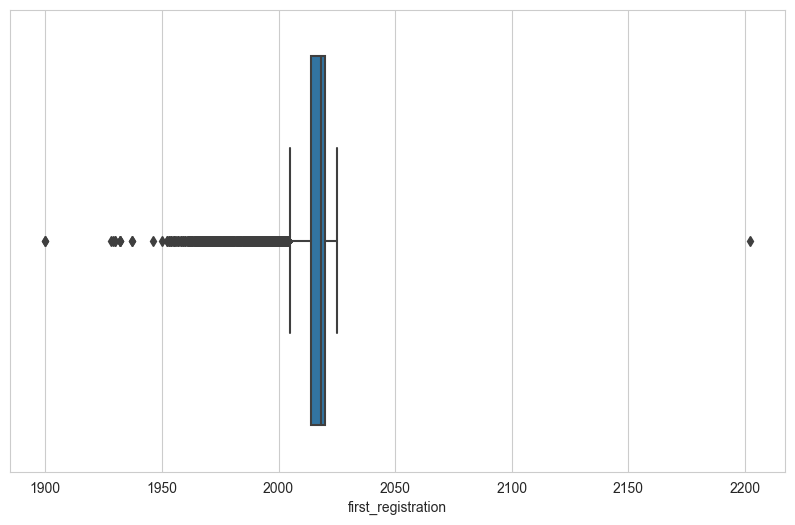

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x="first_registration",data=df)
plt.show()

In [35]:
lower, upper, count = detect_outliers_numeric(df, "first_registration", tukey=1.5)
lower, upper, count

(2005.0, 2029.0, 2350)

In [36]:
df[(df['first_registration']<lower)|(df['first_registration']>upper)]['first_registration'].value_counts()

2004.000    247
2003.000    211
2001.000    191
2002.000    187
2000.000    159
1999.000    144
1998.000     91
1997.000     81
1994.000     80
1995.000     78
1996.000     71
1991.000     62
1992.000     60
1993.000     55
1990.000     54
1966.000     40
1967.000     34
1988.000     33
1965.000     32
1973.000     29
1972.000     29
1987.000     26
1968.000     25
1978.000     23
1986.000     22
1989.000     20
1970.000     19
1985.000     18
1971.000     18
1979.000     17
1969.000     17
1983.000     16
1975.000     14
1977.000     13
1976.000     11
1982.000     11
1964.000     11
1984.000     10
1963.000      9
1981.000      9
1974.000      9
1962.000      8
1961.000      7
1980.000      6
1955.000      6
1960.000      4
1954.000      4
1957.000      4
1958.000      4
1932.000      3
1930.000      2
1959.000      2
1952.000      2
1937.000      2
1900.000      2
1953.000      2
1956.000      1
1946.000      1
2202.000      1
1950.000      1
1929.000      1
1928.000      1
Name: fi

In [37]:
df.loc[df.first_registration>2022.0]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,previous_owner,avg_consumption,age
7011,Renault Clio,16990.000,Sedan,Used,5.000,20926.000,2202.000,Manual,LPG/CNG,Dealer,5.000,101.000,999.000,5.000,96,Front,3.000,"Air conditioning, Cruise control, Electrical s...","Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...",Alloy wheels,Cloth,1.000,6.100,-180.000
9764,Fiat 500 Abarth,17995.000,Compact,Used,3.000,59629.000,2025.000,Manual,Benzine,Dealer,4.000,145.000,1368.000,5.000,139,Front,4.000,"Electrical side mirrors, Leather steering whee...","Bluetooth, Radio","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Emergency tyre repair kit,...",Cloth,1.000,6.000,-3.000
19213,Nissan Micra,3250.000,Convertible,Used,2.000,147985.000,2023.000,Manual,Benzine,Dealer,4.000,110.000,1598.000,5.000,160,Front,4.000,"Air conditioning, Electric tailgate, Electrica...","CD player, On-board computer, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels (15"")",Leather,1.000,5.000,-1.000


In [38]:
df.loc[df.first_registration==1900]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,previous_owner,avg_consumption,age
22058,Ford Bronco,57480.000,Off-Road/Pick-up,Used,5.000,10.000,1900.000,Automatic,Benzine,Dealer,5.000,245.000,2000.000,8.000,194,4WD,4.000,"Air conditioning, Automatic climate control, C...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Alarm system, Central door lock, Daytime ...","Touch screen, Trailer hitch, Voice Control",Leather,1.000,8.300,122.000
24783,Hyundai IONIQ,26991.000,Sedan,Used,5.000,29961.000,1900.000,Automatic,Benzine,Dealer,5.000,140.000,1580.000,6.000,26,Front,4.000,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Alarm system, Bi...","Alloy wheels, Shift paddles, Touch screen",Cloth,1.000,4.200,122.000


In [39]:
df = df[~df['first_registration'].isin([1900,2202, 2025, 2023])]

In [40]:
df.first_registration.value_counts()

2019.000    3666
2018.000    3490
2022.000    3088
2021.000    2870
2020.000    2473
2017.000    2426
2016.000    1486
2015.000    1237
2014.000     936
2013.000     703
2012.000     655
2011.000     642
2010.000     558
2007.000     492
2008.000     441
2009.000     424
2006.000     395
2005.000     287
2004.000     247
2003.000     211
2001.000     191
2002.000     187
2000.000     159
1999.000     144
1998.000      91
1997.000      81
1994.000      80
1995.000      78
1996.000      71
1991.000      62
1992.000      60
1993.000      55
1990.000      54
1966.000      40
1967.000      34
1988.000      33
1965.000      32
1973.000      29
1972.000      29
1987.000      26
1968.000      25
1978.000      23
1986.000      22
1989.000      20
1970.000      19
1985.000      18
1971.000      18
1979.000      17
1969.000      17
1983.000      16
1975.000      14
1977.000      13
1982.000      11
1964.000      11
1976.000      11
1984.000      10
1974.000       9
1981.000       9
1963.000      

## Seats

In [41]:
information("seats")

column name    :  seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
5.000     20712
4.000      5962
2.000      1265
7.000       542
8.000        44
9.000        35
3.000        26
6.000        12
0.000         9
1.000         7
17.000        2
Name: seats, dtype: int64


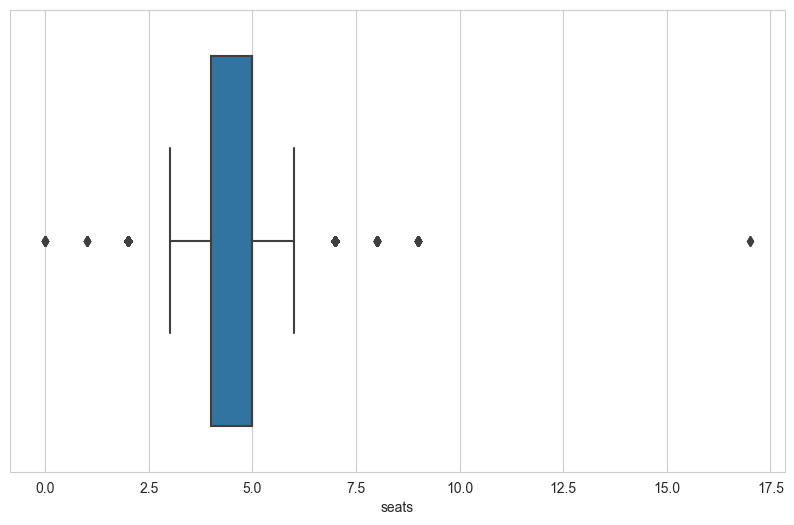

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x="seats",data=df)
plt.show()

In [43]:
lower, upper, count = detect_outliers_numeric(df, "seats", tukey=1.5)
lower, upper, count

(2.5, 6.5, 1904)

In [44]:
df[(df['seats']<lower)|(df['seats']>upper)]['seats'].value_counts()

2.000     1265
7.000      542
8.000       44
9.000       35
0.000        9
1.000        7
17.000       2
Name: seats, dtype: int64

In [45]:
## dropping the outliers
df = df[~df['seats'].isin([8,9, 0, 1, 17])]

In [46]:
df['seats'].value_counts() 

5.000    20712
4.000     5962
2.000     1265
7.000      542
3.000       26
6.000       12
Name: seats, dtype: int64

In [47]:
df.body_type.value_counts()

 Off-Road/Pick-up     5403
 Compact              5380
 Station wagon        5376
 Sedan                5035
 Coupe                4003
 Convertible          3322
Name: body_type, dtype: int64

## Power

In [48]:
information("power")

column name    :  power
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  351
--------------------------------
150.000     2010
131.000     1421
120.000     1194
110.000     1184
90.000      1150
140.000     1051
116.000     1049
101.000      912
190.000      790
69.000       707
136.000      698
95.000       690
75.000       523
125.000      472
200.000      460
163.000      418
170.000      412
109.000      356
179.000      344
122.000      324
184.000      315
160.000      258
177.000      249
235.000      249
156.000      248
114.000      238
300.000      234
204.000      233
105.000      231
280.000      224
111.000      216
91.000       213
197.000      205
86.000       198
132.000      187
72.000       184
141.000      171
450.000      170
392.000      155
80.000       149
194.000      143
99.000       139
250.000      138
165.000      134
60.000       134
82.000       133
92.000       132
102.000      130
224.000      130
245.000    

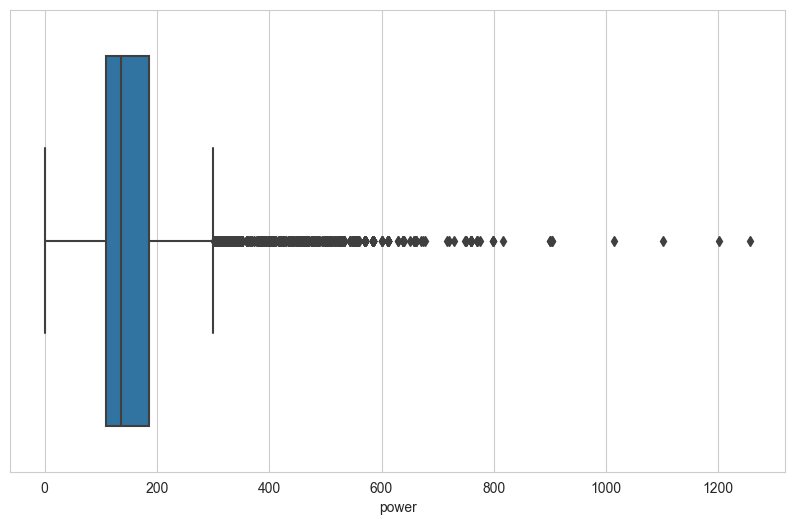

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x="power",data=df)
plt.show()

In [50]:
lower, upper, count = detect_outliers_numeric(df, "power", tukey=1.5)
lower, upper, count

(-6.5, 301.5, 2407)

In [51]:
df[(df['power']<lower)|(df['power']>upper)]['power'].value_counts()

450.000     170
392.000     155
328.000     117
310.000     105
306.000     104
421.000      99
367.000      86
340.000      81
330.000      79
333.000      76
390.000      64
303.000      60
435.000      55
510.000      51
476.000      51
408.000      50
457.000      47
460.000      45
305.000      43
317.000      43
585.000      43
449.000      39
341.000      37
360.000      36
570.000      34
381.000      32
612.000      30
314.000      28
315.000      24
387.000      24
557.000      24
344.000      22
320.000      20
455.000      19
349.000      18
405.000      17
309.000      15
419.000      14
549.000      14
400.000      12
351.000      11
551.000      11
525.000      11
325.000      10
530.000      10
760.000       9
466.000       9
523.000       8
441.000       8
503.000       7
639.000       7
469.000       7
517.000       7
326.000       7
407.000       7
401.000       6
533.000       6
480.000       6
417.000       6
500.000       6
368.000       6
489.000       5
337.000 

In [52]:
df.loc[df.power<60]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,previous_owner,avg_consumption,age
2504,Opel Agila,790.000,Compact,Used,5.000,198455.000,2001.000,Manual,Benzine,Dealer,5.000,58.000,973.000,5.000,0,Front,4.000,Electrical side mirrors,"CD player, MP3, Radio","ABS, Driver-side airbag, Immobilizer, Passenge...",E10-enabled,Cloth,1.000,6.500,21.000
2656,Opel Agila,999.000,Compact,Used,4.000,103000.000,2003.000,Manual,Benzine,Dealer,5.000,58.000,973.000,5.000,156,Front,4.000,Electrical side mirrors,Radio,"Driver-side airbag, Immobilizer, Passenger-sid...",Summer tyres,Cloth,2.000,6.500,19.000
3258,Opel Rekord,15990.000,Coupe,Used,5.000,78000.000,1957.000,Manual,Benzine,Dealer,4.000,45.000,1488.000,3.000,0,Rear,4.000,"Leather steering wheel, Sunroof","Bluetooth, USB",Isofix,"All season tyres, Steel wheels",Leather,2.000,9.000,65.000
3276,Opel Kadett,45000.000,Coupe,Used,5.000,1.000,1976.000,Manual,Benzine,Private seller,4.000,1.000,1900.000,5.000,0,Rear,4.000,Leather steering wheel,Digital radio,Alarm system,"Alloy wheels (13""), E10-enabled, Smoker's pack...",Cloth,2.000,0.000,46.000
3325,Opel Kadett,8980.000,Coupe,Used,2.000,30830.000,1969.000,Manual,Benzine,Dealer,4.000,45.000,1100.000,5.000,0,Rear,4.000,Leather steering wheel,Digital radio,Alarm system,"Alloy wheels (13""), E10-enabled, Smoker's pack...",Cloth,2.000,0.000,53.000
3358,Opel,17000.000,Coupe,Used,2.000,52466.000,1950.000,Manual,Benzine,Private seller,4.000,45.000,1500.000,6.000,0,Rear,4.000,"Air conditioning, Cruise control, Electrical s...","CD player, MP3, On-board computer, Radio","ABS, Central door lock, Central door lock with...",Spare tyre,Cloth,1.000,6.300,72.000
3393,Opel Kadett,9750.000,Coupe,Used,2.000,104205.000,1975.000,Manual,Benzine,Dealer,5.000,52.000,1200.000,4.000,0,Rear,4.000,Leather steering wheel,Digital radio,Alarm system,"Alloy wheels (13""), E10-enabled, Smoker's pack...",Leather,2.000,0.000,47.000
4838,Renault Twizy,8990.000,Compact,Used,2.000,25000.000,2012.000,Automatic,Hybrit,Dealer,2.000,16.000,1598.000,1.000,0,Rear,1.000,Parking assist system sensors rear,On-board computer,"Driver-side airbag, Immobilizer, Passenger-sid...","Alloy wheels, Summer tyres",Leather,2.000,5.400,10.000
4886,Renault Twizy,10390.000,Compact,Pre-registered,5.000,10.000,2021.000,Automatic,Hybrit,Dealer,2.000,18.000,1598.000,1.000,0,Rear,1.000,Parking assist system sensors rear,On-board computer,"ABS, Driver-side airbag, Electronic stability ...","Alloy wheels, Summer tyres",Leather,1.000,5.400,1.000
4915,Renault Twingo,1850.000,Compact,Used,2.000,134000.000,2007.000,Manual,Benzine,Dealer,4.000,58.000,1149.000,5.000,138,Rear,3.000,"Armrest, Panorama roof, Power windows, Sunroof","CD player, On-board computer, Radio","ABS, Driver-side airbag, Immobilizer, Passenge...","Spare tyre, Steel wheels, Summer tyres, Winter...",Cloth,2.000,5.800,15.000


In [53]:
df.power.loc[df.power<60] = np.nan

In [54]:
df.power.isnull().sum()

217

In [55]:
 def filling_mode(df, group_col1, group_col2, col_name):
    
    for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

In [56]:
filling_mode(df, "make_model", "body_type", "power")

In [57]:
df.power.isnull().sum()

0

In [58]:
lower, upper, count = detect_outliers_numeric(df, "power", tukey=1.5)
lower, upper, count

(-4.0, 300.0, 2407)

In [59]:
df[(df['power']<lower)|(df['power']>upper)]['power'].value_counts()

450.000     170
392.000     155
328.000     117
310.000     105
306.000     104
421.000      99
367.000      86
340.000      81
330.000      79
333.000      76
390.000      64
303.000      60
435.000      55
510.000      51
476.000      51
408.000      50
457.000      47
460.000      45
305.000      43
317.000      43
585.000      43
449.000      39
341.000      37
360.000      36
570.000      34
381.000      32
612.000      30
314.000      28
315.000      24
387.000      24
557.000      24
344.000      22
320.000      20
455.000      19
349.000      18
405.000      17
309.000      15
419.000      14
549.000      14
400.000      12
351.000      11
551.000      11
525.000      11
325.000      10
530.000      10
760.000       9
466.000       9
523.000       8
441.000       8
503.000       7
639.000       7
469.000       7
517.000       7
326.000       7
407.000       7
401.000       6
533.000       6
480.000       6
417.000       6
500.000       6
368.000       6
489.000       5
337.000 

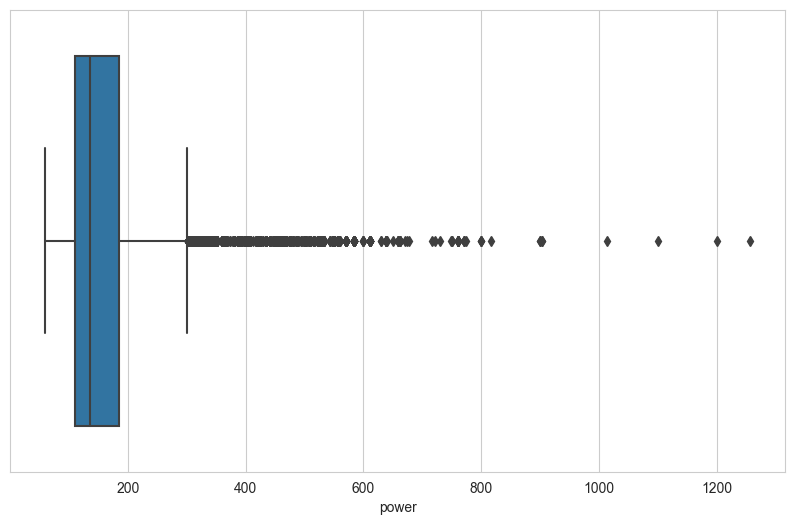

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x="power",data=df)
plt.show()

In [61]:
df.loc[df.power > 800]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,previous_owner,avg_consumption,age
17299,Toyota Supra,120000.000,Coupe,Used,3.000,188588.000,1993.000,Manual,Benzine,Private seller,4.000,900.000,2997.000,6.000,0,Rear,6.000,"360° camera, Air conditioning, Automatic clima...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Central door lock, Driver-side airbag, El...","Alloy wheels (19""), Cargo barrier, Spare tyre,...",Leather,1.000,7.500,29.000
17321,Toyota Supra,69950.000,Coupe,Used,2.000,125000.000,1998.000,Manual,Benzine,Dealer,2.000,1256.000,2997.000,6.000,0,Rear,6.000,"Air conditioning, Automatic climate control, C...","Apple CarPlay, Bluetooth, Digital radio, Hands...","ABS, Adaptive headlights, Alarm system, Centra...","Alloy wheels (18""), Automatically dimming inte...",Cloth,1.000,7.500,24.000
19288,Nissan GT-R,169000.000,Coupe,Used,2.000,11000.000,2020.000,Automatic,Benzine,Dealer,4.000,1014.000,3799.000,6.000,300,4WD,6.000,"Armrest, Automatic climate control, 2 zones, K...","CD player, Hands-free equipment, On-board comp...","ABS, Alarm system, Driver-side airbag, Electro...","Alloy wheels, Voice Control",Leather,1.000,11.900,2.000
19469,Nissan GT-R,139977.000,Coupe,Used,2.000,53980.000,2017.000,Automatic,Benzine,Dealer,4.000,1201.000,3799.000,6.000,275,4WD,6.000,"Armrest, Automatic climate control, 2 zones, C...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive headlights, Alarm system, Centra...","Alloy wheels (20""), Automatically dimming inte...",Leather,1.000,11.900,5.000
19473,Nissan GT-R,82500.000,Coupe,Used,2.000,98111.000,2010.000,Automatic,Benzine,Dealer,4.000,904.000,3799.000,6.000,298,4WD,6.000,"Air conditioning, Automatic climate control, C...","CD player, On-board computer, Radio","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (20""), Headlight washer system, S...",Leather,2.000,12.400,12.000
19499,Nissan GT-R,79950.000,Coupe,Used,2.000,121194.000,2009.000,Automatic,Benzine,Dealer,4.000,1101.000,3799.000,6.000,0,4WD,6.000,"Air conditioning, Armrest, Automatic climate c...","CD player, Radio","ABS, Alarm system, Central door lock, Central ...","Alloy wheels, Spoiler, Sport package, Sport se...",Leather,2.000,11.900,13.000
19534,Nissan GT-R,69500.000,Coupe,Used,2.000,132558.000,2009.000,Semi-automatic,Benzine,Private seller,4.000,816.000,3799.000,6.000,0,4WD,6.000,"Air conditioning, Automatic climate control, C...","Bluetooth, CD player, Digital radio, Hands-fre...","ABS, Electronic stability control, Power steer...",Alloy wheels,Leather,2.000,12.400,13.000
19584,Nissan GT-R,89900.000,Coupe,Used,2.000,87500.000,2009.000,Automatic,Benzine,Dealer,4.000,903.000,3799.000,6.000,298,4WD,6.000,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Hands-free equipment, MP...","Alarm system, Central door lock, Central door ...","Alloy wheels (20""), Catalytic Converter, Shift...",Leather,3.000,12.400,13.000
21772,Ford Mustang,59900.000,Coupe,Used,2.000,48000.000,2013.000,Manual,Benzine,Dealer,4.000,900.000,5400.000,6.000,0,Rear,8.000,"Air conditioning, Automatic climate control, M...","Bluetooth, CD player, MP3, On-board computer","ABS, Alarm system, Central door lock, Driver-s...",Alloy wheels,Leather,1.000,12.100,9.000


In [62]:
df = df[~df['power'].isin([900,1256, 1014, 1201, 904, 1101, 816, 903])]

In [63]:
df.power.shape

(28510,)

## Engine Size

In [64]:
information("engine_size")

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  464
--------------------------------
1598.000     2238
999.000      2140
1969.000     1967
1461.000     1144
1998.000     1056
998.000       952
1199.000      931
1498.000      785
1997.000      647
1968.000      631
1984.000      584
1332.000      530
1798.000      487
1560.000      479
898.000       432
1242.000      421
1499.000      411
1197.000      382
1991.000      357
1368.000      354
1995.000      339
1248.000      332
0.000         330
2435.000      309
5038.000      303
1600.000      296
2143.000      249
1364.000      230
1500.000      213
2000.000      206
3982.000      205
1956.000      203
1950.000      203
1591.000      203
3498.000      180
1395.000      175
1987.000      164
1200.000      162
1796.000      160
1149.000      159
3696.000      158
2400.000      156
1497.000      154
1490.000      153
1198.000      153
1999.000      147
1398.000  

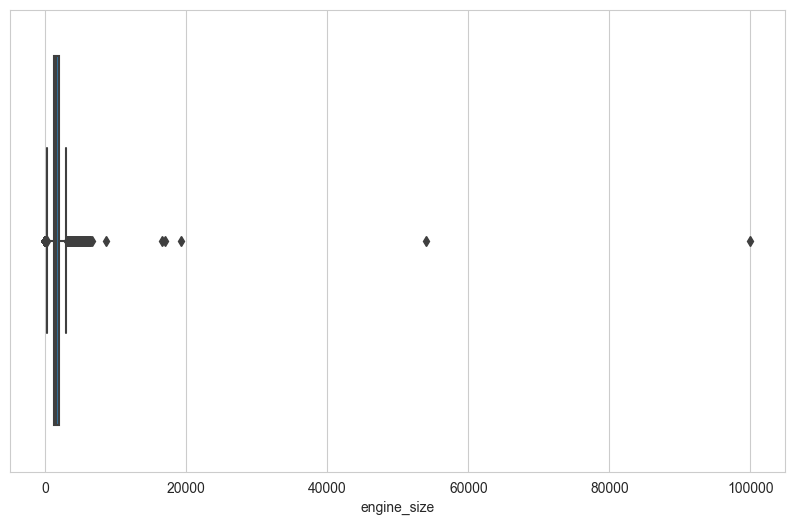

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x="engine_size",data=df)
plt.show()

In [66]:
lower, upper, count = detect_outliers_numeric(df, "engine_size", tukey=1.5)
lower, upper, count

(274.0, 3010.0, 1921)

In [67]:
df[(df['engine_size']<lower)|(df['engine_size']>upper)]['engine_size'].value_counts()

0.000        330
5038.000     303
3982.000     205
3498.000     180
3696.000     158
1.000        110
4951.000      89
3799.000      71
5461.000      51
4663.000      31
5000.000      20
4966.000      19
3778.000      19
3198.000      17
4606.000      13
5200.000      12
2.000         12
6208.000      12
4700.000      10
4009.000      10
4949.000      10
3720.000       9
5439.000       9
3700.000       9
3199.000       7
4973.000       7
4600.000       7
3731.000       7
3600.000       7
3200.000       7
3496.000       6
3956.000       5
3955.000       5
3950.000       5
3500.000       5
5513.000       5
3726.000       4
5980.000       4
4000.000       4
3800.000       4
5162.000       4
5600.000       4
3724.000       4
3606.000       4
3878.000       3
5400.000       3
4414.000       3
4952.000       3
3996.000       3
5.000          3
4200.000       2
5032.000       2
5987.000       2
4996.000       2
3597.000       2
5689.000       2
4742.000       2
5409.000       2
4728.000      

In [68]:
df.sort_values(by=["engine_size"], ascending=False)["engine_size"].head(20)

16556   99900.000
21330   54009.000
716     19194.000
5580    16998.000
16105   16597.000
21667    8660.000
21797    6653.000
21345    6400.000
21653    6400.000
21393    6387.000
699      6300.000
693      6300.000
21481    6294.000
21333    6276.000
703      6209.000
1956     6208.000
722      6208.000
853      6208.000
813      6208.000
2072     6208.000
Name: engine_size, dtype: float64

In [69]:
df.sort_values(by=["engine_size"], ascending=True)["engine_size"].head(20)

20562   0.000
2745    0.000
22247   0.000
7585    0.000
22185   0.000
22176   0.000
7396    0.000
7132    0.000
7124    0.000
7116    0.000
7114    0.000
7113    0.000
7102    0.000
7071    0.000
7060    0.000
6982    0.000
6952    0.000
6943    0.000
6918    0.000
14317   0.000
Name: engine_size, dtype: float64

In [70]:
df.engine_size.loc[df.engine_size > 4000] = np.nan

In [71]:
df.engine_size.loc[df.engine_size == 0] = np.nan

In [72]:
df.sort_values(by=["engine_size"], ascending=True)["engine_size"].head(20)

2372    1.000
5102    1.000
1425    1.000
5100    1.000
1427    1.000
11479   1.000
11044   1.000
5097    1.000
18263   1.000
24663   1.000
5093    1.000
24660   1.000
1436    1.000
2328    1.000
5087    1.000
11467   1.000
4923    1.000
24661   1.000
2317    1.000
4963    1.000
Name: engine_size, dtype: float64

In [73]:
df.engine_size.loc[df.engine_size < 750] = np.nan

In [74]:
filling_mode(df, "make_model", "body_type", "engine_size")

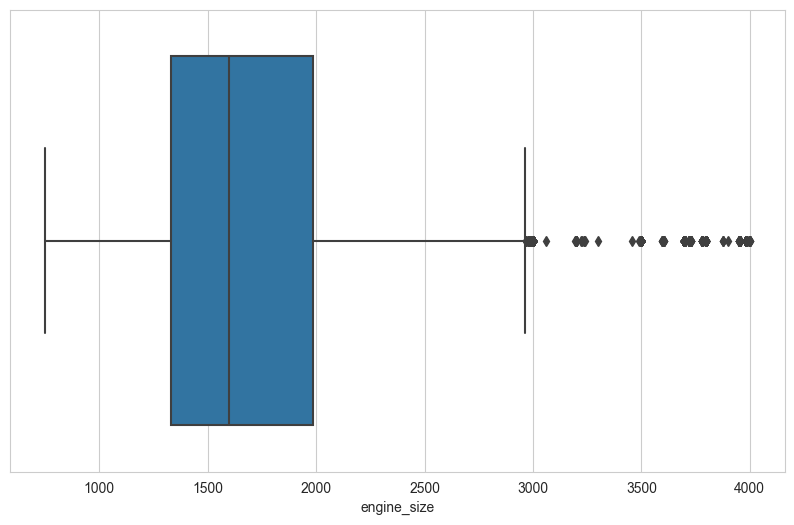

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(x="engine_size",data=df)
plt.show()

## Gears

In [76]:
information("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
6.000     12186
5.000      7601
7.000      2753
8.000      2697
1.000      1323
9.000      1128
10.000      370
4.000       356
3.000        62
0.000        31
2.000         3
Name: gears, dtype: int64


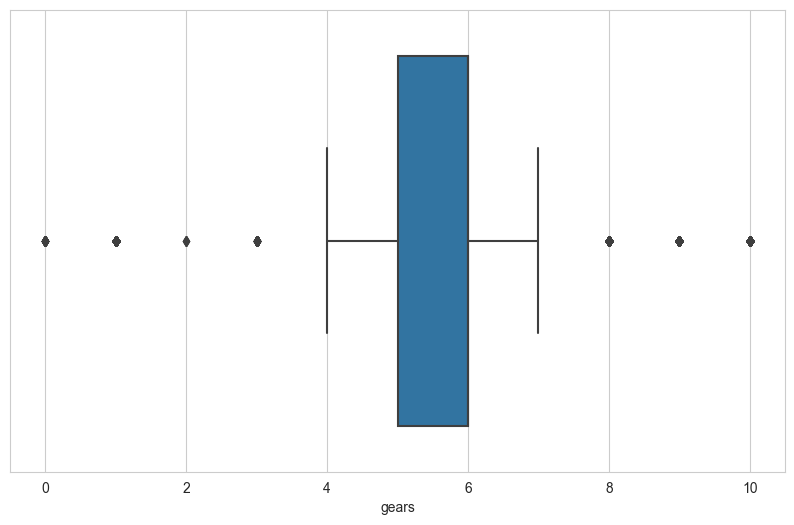

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(x="gears",data=df)
plt.show()

In [78]:
lower, upper, count = detect_outliers_numeric(df, "gears", tukey=1.5)
lower, upper, count

(3.5, 7.5, 5614)

In [79]:
df[(df['gears']<lower)|(df['gears']>upper)]['gears'].value_counts()

8.000     2697
1.000     1323
9.000     1128
10.000     370
3.000       62
0.000       31
2.000        3
Name: gears, dtype: int64

In [80]:
df.loc[(df['gears']<5)|(df['gears']>8), "gears"] = np.nan

In [81]:
filling_mode(df, "make_model", "body_type", "gears")

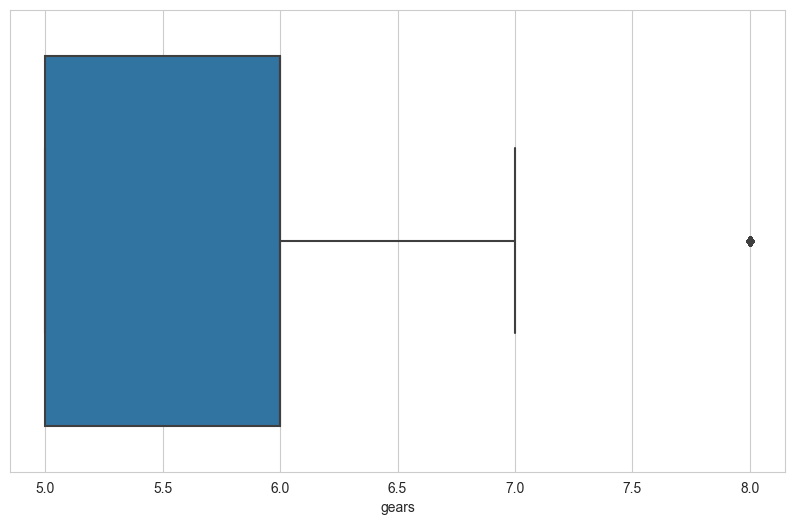

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x="gears",data=df)
plt.show()

## Co2 Emissions

In [83]:
df.co2_emissions= df.co2_emissions.apply(lambda x: str(x.replace(',','')))

In [84]:
df.co2_emissions= df.co2_emissions.astype(float)

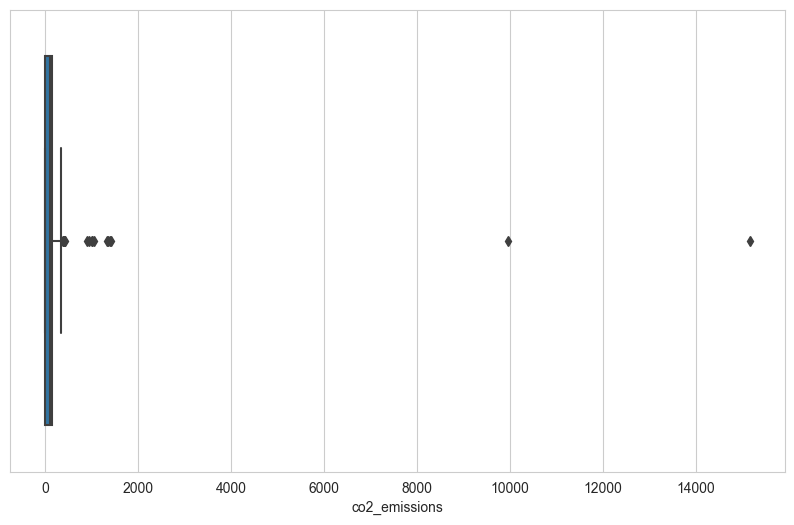

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x="co2_emissions",data=df)
plt.show()

In [86]:
lower, upper, count = detect_outliers_numeric(df, "co2_emissions", tukey=1.5)
lower, upper, count

(-210.0, 350.0, 21)

In [87]:
df[(df['co2_emissions']<lower)|(df['co2_emissions']>upper)]['co2_emissions'].value_counts()

400.000      2
1000.000     2
414.000      2
1360.000     1
1060.000     1
15168.000    1
1390.000     1
1320.000     1
1410.000     1
377.000      1
910.000      1
9954.000     1
399.000      1
394.000      1
420.000      1
940.000      1
373.000      1
398.000      1
Name: co2_emissions, dtype: int64

In [88]:
df = df[~df['co2_emissions'].isin([400, 1000, 414, 1360, 1060, 15168, 1390, 1320, 1410, 377, 910, 9954, 399, 394, 420, 940, 398,373])]

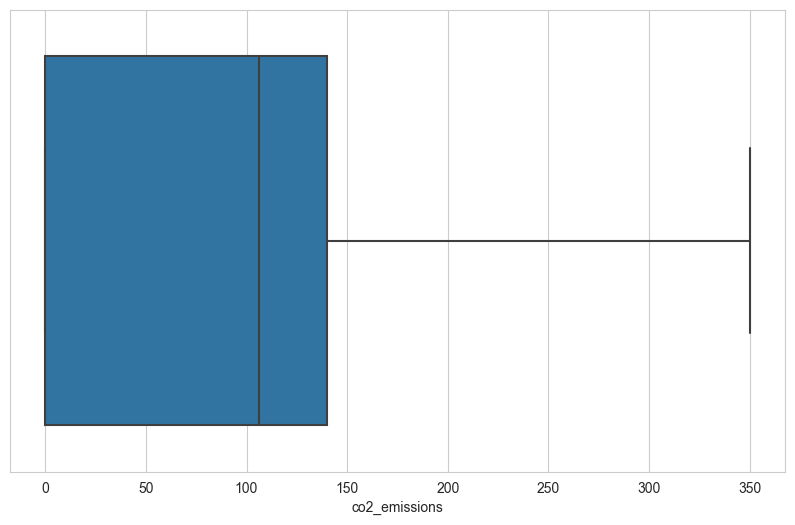

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x="co2_emissions",data=df)
plt.show()

## Cylinders

In [90]:
information("cylinders")

column name    :  cylinders
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  12
--------------------------------
4.000     19689
3.000      5137
6.000      1311
5.000       969
8.000       936
0.000       187
1.000       134
2.000       107
12.000       11
7.000         6
26.000        1
16.000        1
Name: cylinders, dtype: int64


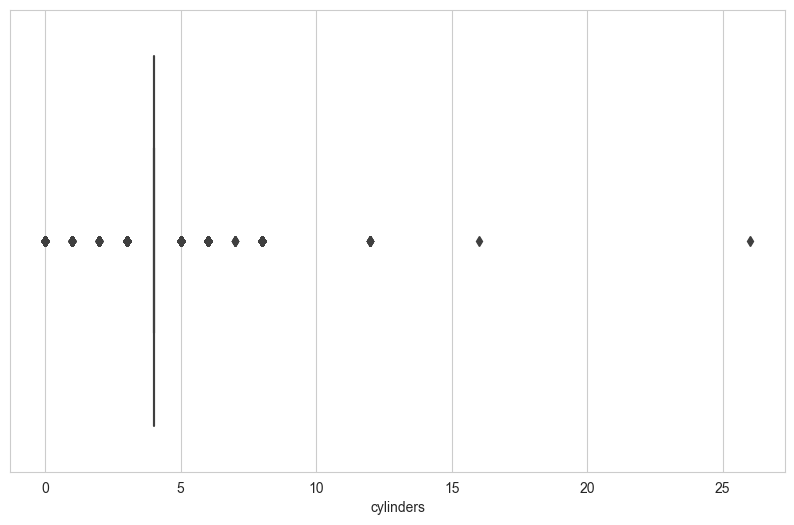

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cylinders",data=df)
plt.show()

In [92]:
lower, upper, count = detect_outliers_numeric(df, "cylinders", tukey=1.5)
lower, upper, count

(4.0, 4.0, 8800)

In [93]:
df[(df['cylinders']<lower)|(df['cylinders']>upper)]['cylinders'].value_counts()

3.000     5137
6.000     1311
5.000      969
8.000      936
0.000      187
1.000      134
2.000      107
12.000      11
7.000        6
26.000       1
16.000       1
Name: cylinders, dtype: int64

In [94]:
df = df[~df['cylinders'].isin([0, 1, 7, 12, 16 ,26])]

In [95]:
df.shape

(28149, 25)

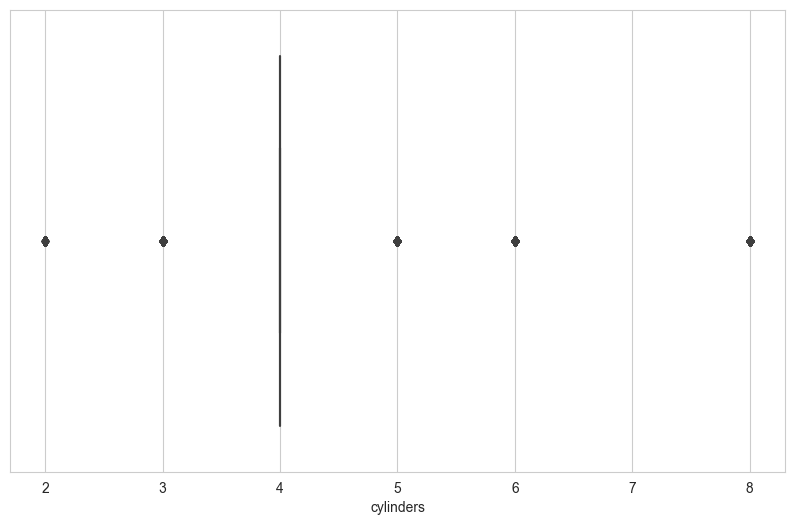

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cylinders",data=df)
plt.show()

## Age

In [97]:
information("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  78
--------------------------------
3.000     3623
4.000     3460
0.000     2990
1.000     2778
2.000     2407
5.000     2398
6.000     1468
7.000     1221
8.000      927
9.000      693
10.000     649
11.000     639
12.000     551
15.000     488
14.000     437
13.000     418
16.000     390
17.000     287
18.000     246
19.000     209
21.000     190
20.000     187
22.000     159
23.000     142
24.000      89
25.000      80
28.000      78
27.000      78
26.000      70
31.000      62
30.000      60
29.000      53
32.000      53
56.000      40
57.000      32
55.000      32
34.000      32
49.000      29
50.000      29
35.000      26
54.000      25
44.000      22
36.000      22
33.000      20
52.000      19
37.000      18
51.000      18
53.000      17
43.000      16
39.000      16
47.000      14
45.000      13
58.000      11
46.000      11
38.000      10
40.000       9
41.000 

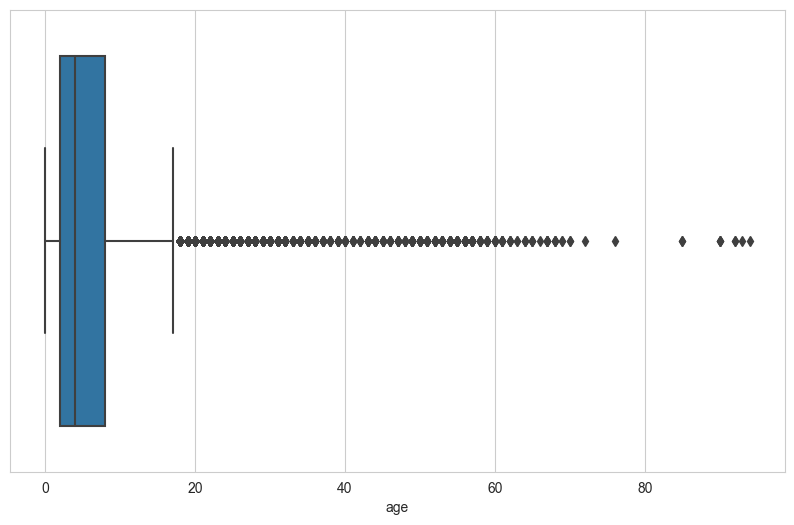

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x="age",data=df)
plt.show()

In [99]:
lower, upper, count = detect_outliers_numeric(df, "age", tukey=1.5)
lower, upper, count

(-7.0, 17.0, 2325)

In [100]:
df[(df['age']<lower)|(df['age']>upper)]['age'].value_counts()

18.000    246
19.000    209
21.000    190
20.000    187
22.000    159
23.000    142
24.000     89
25.000     80
28.000     78
27.000     78
26.000     70
31.000     62
30.000     60
32.000     53
29.000     53
56.000     40
55.000     32
34.000     32
57.000     32
50.000     29
49.000     29
35.000     26
54.000     25
44.000     22
36.000     22
33.000     20
52.000     19
37.000     18
51.000     18
53.000     17
39.000     16
43.000     16
47.000     14
45.000     13
46.000     11
58.000     11
38.000     10
59.000      9
41.000      9
48.000      9
40.000      9
60.000      8
61.000      7
42.000      6
67.000      6
64.000      4
68.000      4
62.000      4
65.000      4
90.000      3
85.000      2
63.000      2
69.000      2
92.000      2
70.000      2
76.000      1
93.000      1
66.000      1
94.000      1
72.000      1
Name: age, dtype: int64

## Previous Owner

In [101]:
information("previous_owner")

column name    :  previous_owner
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
--------------------------------
1.000     20869
2.000      6185
3.000       743
4.000       187
5.000        69
6.000        37
7.000        22
8.000        16
9.000        14
12.000        3
10.000        2
14.000        1
13.000        1
Name: previous_owner, dtype: int64


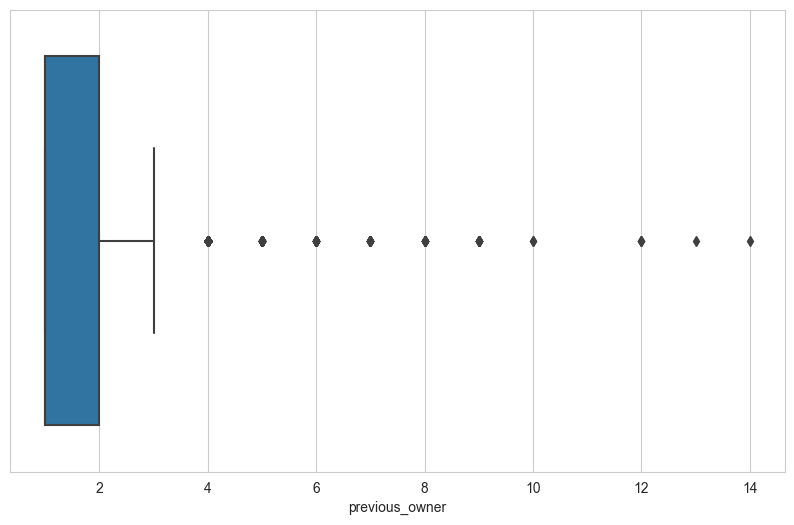

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(x="previous_owner",data=df)
plt.show()

In [103]:
lower, upper, count = detect_outliers_numeric(df, "previous_owner", tukey=1.5)
lower, upper, count

(-0.5, 3.5, 352)

In [104]:
df[(df['previous_owner']<lower)|(df['previous_owner']>upper)]['previous_owner'].value_counts()

4.000     187
5.000      69
6.000      37
7.000      22
8.000      16
9.000      14
12.000      3
10.000      2
14.000      1
13.000      1
Name: previous_owner, dtype: int64

In [105]:
#According to the price, age and make_model columns,we decided that data of this column isn't necessary to analyze
df.drop("previous_owner", axis = 1, inplace = True)

## Average Consumption

In [106]:
information("avg_consumption")

column name    :  avg_consumption
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  183
--------------------------------
5.400     1294
4.900     1149
5.000     1103
5.100     1099
4.500      955
5.600      903
4.200      773
5.700      685
4.600      661
5.300      655
5.900      649
4.800      638
4.700      638
3.800      637
4.400      632
5.200      600
4.100      594
5.500      584
4.300      551
6.300      549
6.000      510
7.400      454
4.000      446
6.400      426
5.800      426
6.600      416
3.600      407
6.500      398
6.200      383
0.000      372
6.100      337
7.000      326
7.100      321
12.100     316
3.700      282
3.400      282
6.900      267
6.700      260
7.600      252
6.800      243
3.900      241
7.300      225
8.400      224
8.000      212
7.700      211
7.500      204
7.200      186
3.500      181
8.200      167
7.800      165
12.000     140
9.800      139
9.200      122
8.900      120
9.700      115
8.300    

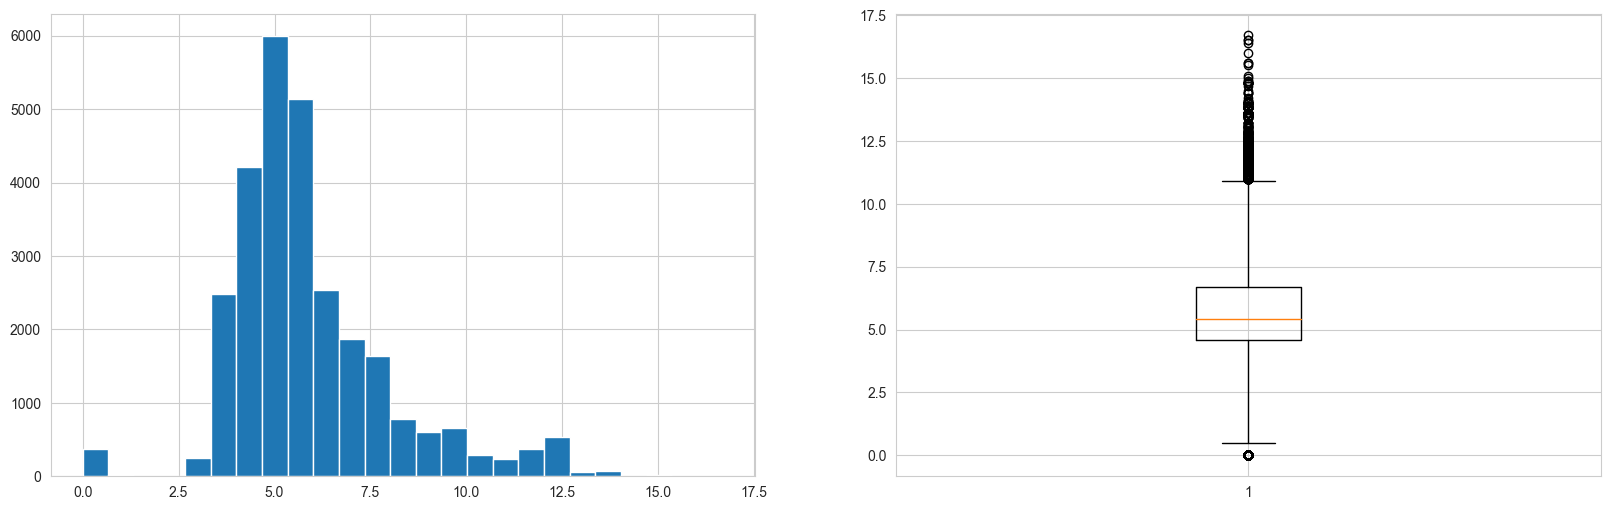

In [107]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.avg_consumption, bins = 25)

plt.subplot(122)
plt.boxplot(df.avg_consumption, whis = 2)

plt.show()

In [108]:
lower, upper, count = detect_outliers_numeric(df, "avg_consumption", tukey=1.5)
lower, upper, count

(1.4499999999999988, 9.850000000000001, 2127)

In [109]:
df[(df['avg_consumption']<lower)|(df['avg_consumption']>upper)]['avg_consumption'].value_counts()

0.000     372
12.100    316
12.000    140
12.500    103
10.100     82
10.000     77
10.600     66
9.900      65
10.900     65
11.800     63
11.400     62
11.000     45
10.500     44
12.400     39
12.800     37
11.200     36
12.200     34
11.700     34
10.400     34
10.300     31
11.900     29
10.800     28
12.300     26
11.300     24
13.600     22
11.500     21
10.200     20
13.500     19
11.600     18
14.000     15
10.700     14
12.600     13
11.100     12
13.800     10
11.150     10
0.800       9
14.800      8
13.900      7
13.100      6
12.700      6
12.900      6
13.000      5
13.200      5
1.100       4
10.750      4
13.400      4
14.400      3
10.150      3
14.100      3
1.000       2
10.450      2
16.500      2
15.600      2
14.900      2
10.550      2
0.500       1
14.500      1
0.900       1
0.850       1
12.250      1
15.100      1
14.700      1
15.000      1
0.700       1
16.400      1
15.500      1
10.250      1
16.000      1
1.400       1
16.700      1
14.200      1
Name: 

In [110]:
df.avg_consumption.sort_values().head(10)

14016   0.000
716     0.000
9632    0.000
9628    0.000
21196   0.000
740     0.000
9558    0.000
9439    0.000
21166   0.000
26294   0.000
Name: avg_consumption, dtype: float64

In [111]:
df.avg_consumption.sort_values().tail(10)

21653   15.000
423     15.100
19917   15.500
17697   15.600
17813   15.600
7687    16.000
864     16.400
1214    16.500
1253    16.500
10406   16.700
Name: avg_consumption, dtype: float64

In [112]:
df = df[~df['avg_consumption'].isin([0,0.5, 0.7, 0.85,  0.850, 0.9, 1, 1.1, 0.8, 15, 15.1, 15.5, 15.6, 16, 16, 16.4, 16.5, 16.7])]

In [113]:
df.avg_consumption.sort_values().head(10)

23925   0.850
9001    1.400
28076   1.700
27692   1.700
17149   2.200
213     2.400
211     2.400
186     2.400
184     2.400
162     2.400
Name: avg_consumption, dtype: float64

In [114]:
df.loc[df.avg_consumption==  0.850]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,avg_consumption,age


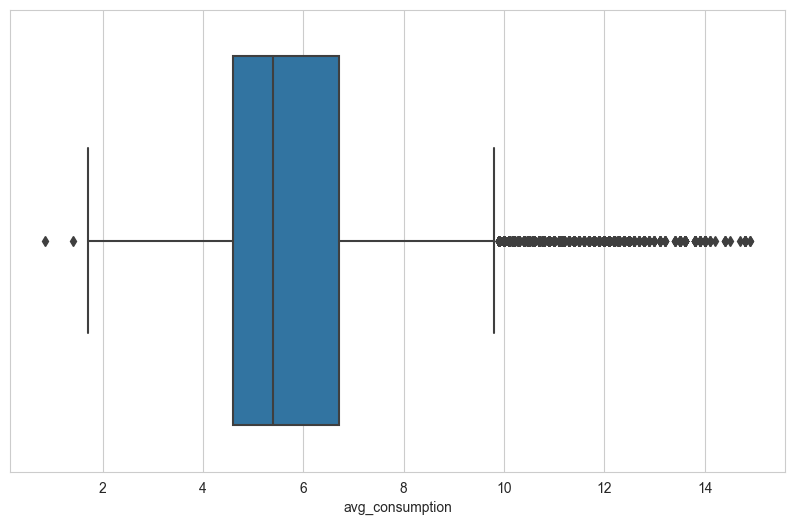

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(x="avg_consumption",data=df)
plt.show()

## Price

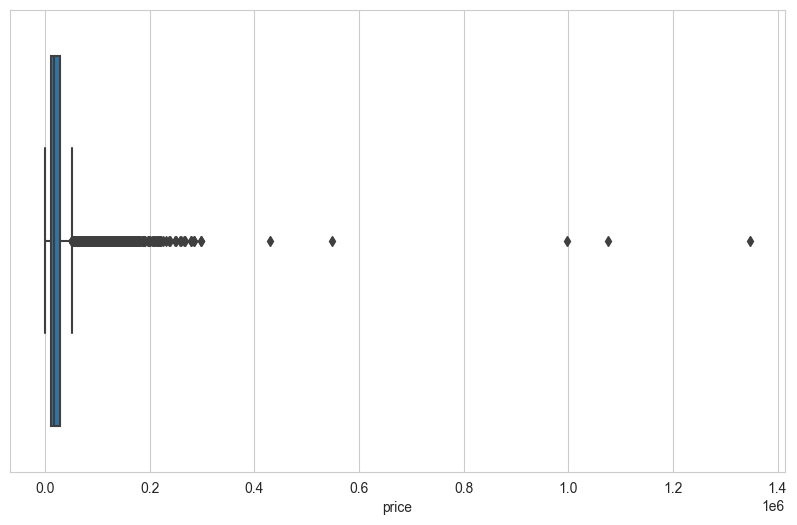

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(x="price",data=df)
plt.show()

In [117]:
lower, upper, count = detect_outliers_numeric(df, "price", tukey=1.5)
lower, upper, count

(-12095.0, 52025.0, 1768)

In [118]:
df.loc[df.price<5000]

,make_model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,seller,seats,power,engine_size,gears,co2_emissions,drivetrain,cylinders,comfort_convenience,entertainment_media,safety_security,extras,upholstery,avg_consumption,age
5,Mercedes-Benz C 160,4690.000,Compact,Used,3.000,165000.000,2005.000,Manual,Benzine,Dealer,4.000,122.000,1799.000,6.000,196.000,Rear,4.000,"Air conditioning, Armrest, Automatic climate c...","CD player, On-board computer, Radio","ABS, Bi-Xenon headlights, Central door lock, D...","Alloy wheels (17""), Catalytic Converter, Emerg...",Cloth,8.200,17.000
88,Mercedes-Benz E 300,4500.000,Compact,Used,4.000,208608.000,1986.000,Automatic,LPG/CNG,Private seller,5.000,170.000,1950.000,7.000,96.000,Rear,6.000,"Armrest, Electrical side mirrors, Split rear s...",Radio,"ABS, Alarm system, Central door lock, Central ...",Summer tyres,Cloth,6.200,36.000
149,Mercedes-Benz A 160,4850.000,Compact,Used,5.000,176000.000,2011.000,Manual,Benzine,Dealer,5.000,95.000,1498.000,5.000,139.000,Front,4.000,"Air conditioning, Armrest, Electrical side mir...","CD player, On-board computer, Radio, Sound system","ABS, Central door lock, Central door lock with...","Automatically dimming interior mirror, Catalyt...",Cloth,5.800,11.000
282,Mercedes-Benz 280,4900.000,Compact,Used,5.000,457379.000,1985.000,Manual,Benzine,Dealer,5.000,185.000,2746.000,5.000,0.000,Rear,6.000,"Air conditioning, Armrest, Power windows, Sunroof",Radio,Power steering,Spare tyre,Cloth,5.400,37.000
332,Mercedes-Benz A 180,4500.000,Compact,Used,5.000,242000.000,2007.000,Manual,Diesel,Dealer,5.000,109.000,1991.000,6.000,0.000,Front,4.000,"Air conditioning, Automatic climate control, E...",USB,"ABS, Central door lock, Driver-side airbag, El...",Alloy wheels,Cloth,5.200,15.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28596,Volvo S60,3900.000,Sedan,Used,4.000,207839.000,2003.000,Manual,Diesel,Dealer,5.000,163.000,2401.000,5.000,171.000,Front,5.000,"Air conditioning, Leather steering wheel, Powe...","On-board computer, Radio","ABS, Alarm system, Central door lock, Driver-s...",Alloy wheels,Leather,6.500,19.000
28602,Volvo S70,1700.000,Sedan,Used,4.000,299000.000,1999.000,Manual,Benzine,Dealer,5.000,140.000,2435.000,5.000,0.000,Front,5.000,"Air conditioning, Automatic climate control, E...",CD player,"ABS, Central door lock, Driver-side airbag, Fo...",Alloy wheels,Leather,10.000,23.000
28610,Volvo S60,3900.000,Sedan,Used,4.000,298000.000,2002.000,Automatic,LPG/CNG,Dealer,5.000,140.000,2435.000,5.000,96.000,Front,5.000,"Automatic climate control, 2 zones, Cruise con...","CD player, MP3, On-board computer, Radio","ABS, Central door lock with remote control, Dr...",Emergency tyre,Leather,5.800,20.000
28624,Volvo S60,4999.000,Sedan,Used,4.000,166512.000,2004.000,Manual,Benzine,Dealer,5.000,209.000,2521.000,5.000,0.000,Front,5.000,"Air conditioning, Automatic climate control, E...",On-board computer,"ABS, Central door lock, Driver-side airbag, El...",Alloy wheels,Leather,9.100,18.000


In [119]:
df.price.describe()

count     27749.000
mean      23199.954
std       23867.526
min         490.000
25%       11950.000
50%       17900.000
75%       27980.000
max     1346900.000
Name: price, dtype: float64

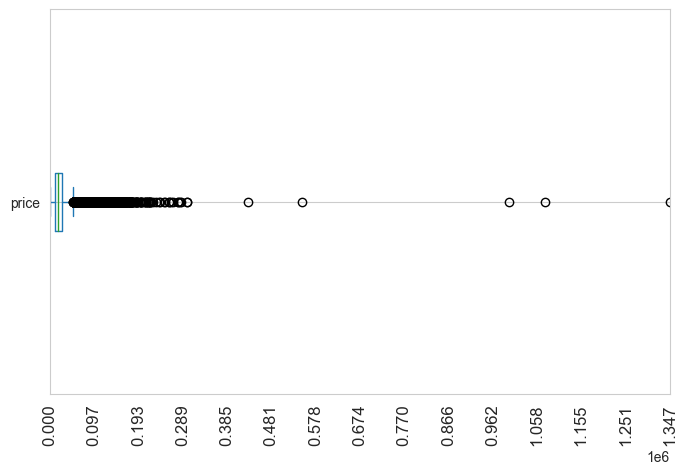

In [120]:
df['price'].plot.box(figsize=(8, 5), vert=0)
plt.xticks(np.linspace(*df['price'].apply([min, max]), num=15), rotation=90, ha='center', fontsize=12);
plt.xlim(df['price'].apply([min, max]))
plt.grid(axis="x")

In [121]:
df['price'].value_counts().sort_index()

490.000        1
500.000        2
590.000        1
600.000        2
699.000        1
              ..
430000.000     1
549000.000     1
998000.000     1
1075900.000    1
1346900.000    1
Name: price, Length: 4901, dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 0 to 28629
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           27749 non-null  object 
 1   price                27749 non-null  float64
 2   body_type            27749 non-null  object 
 3   type                 27749 non-null  object 
 4   doors                27749 non-null  float64
 5   mileage              27749 non-null  float64
 6   first_registration   27749 non-null  float64
 7   gearbox              27749 non-null  object 
 8   fuel_type            27749 non-null  object 
 9   seller               27749 non-null  object 
 10  seats                27749 non-null  float64
 11  power                27749 non-null  float64
 12  engine_size          27749 non-null  float64
 13  gears                27749 non-null  float64
 14  co2_emissions        27749 non-null  float64
 15  drivetrain           27749 non-null 

# Final Step (Checking final situation of data via graphs)

In [123]:
numeric_cols = df.select_dtypes('number').columns
numeric_cols

Index(['price', 'doors', 'mileage', 'first_registration', 'seats', 'power',
       'engine_size', 'gears', 'co2_emissions', 'cylinders', 'avg_consumption',
       'age'],
      dtype='object')

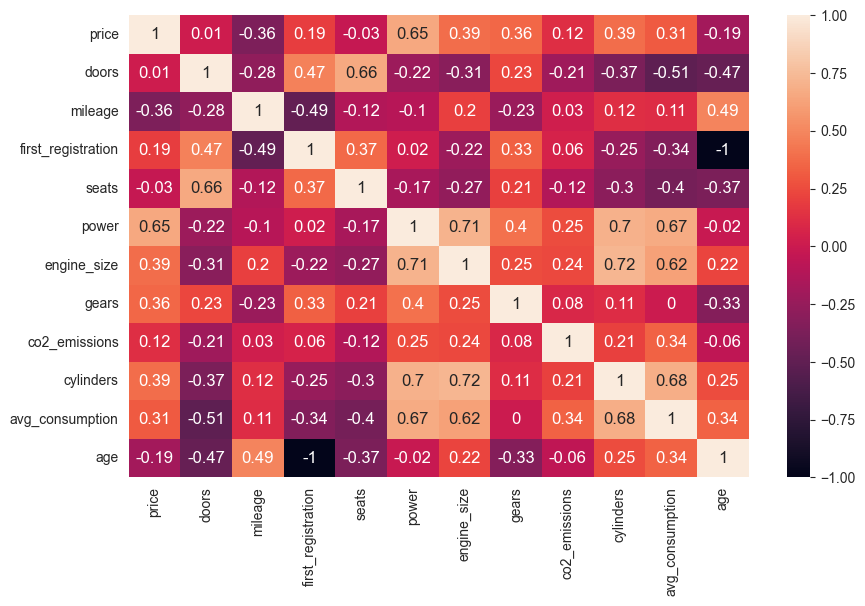

In [124]:
sns.heatmap(
    df[numeric_cols].corr().round(2), 
   annot=True, vmin=-1, vmax=1,
    annot_kws={'fontsize':12}
);

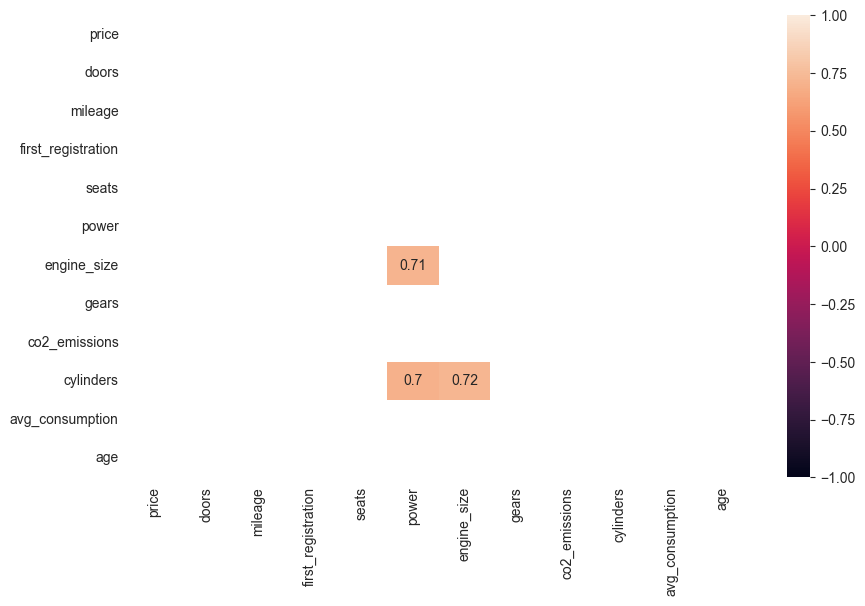

In [125]:
sns.heatmap(
    df.corr()[(abs(df.corr())>=0.7) & (abs(df.corr())<=1)], 
    mask=np.triu(np.ones_like(df[numeric_cols].corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
);

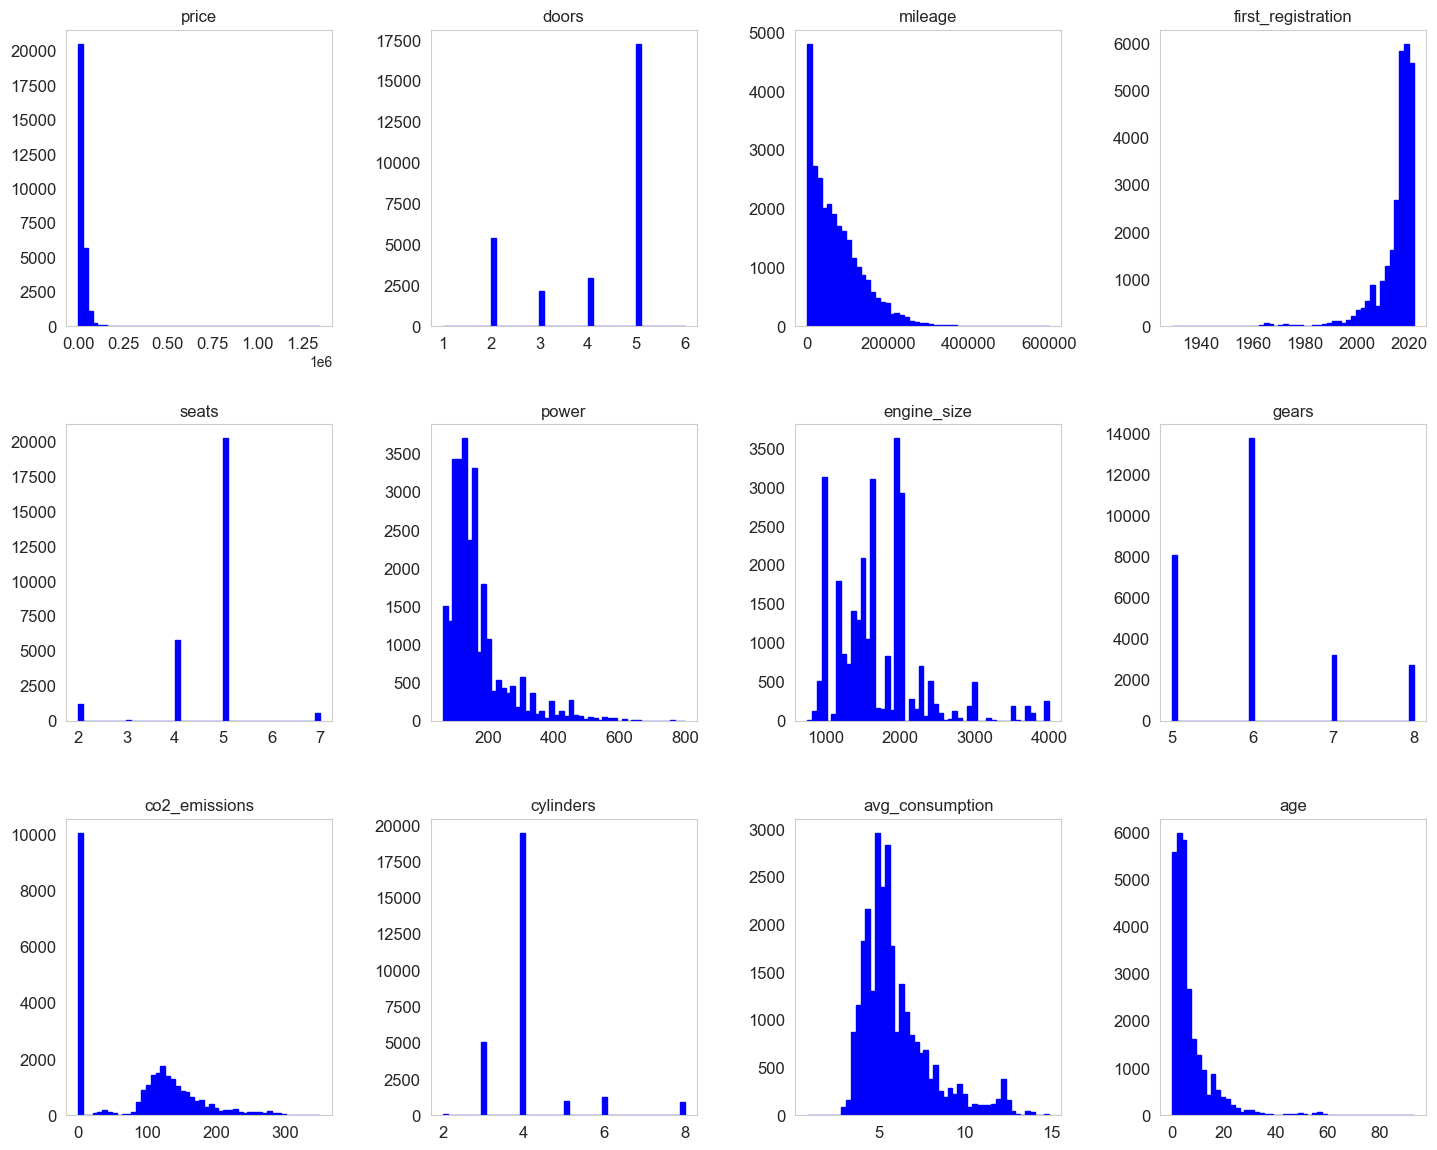

In [126]:
ax = df[numeric_cols].hist(
    layout=(int(np.ceil(len(numeric_cols)/4)), 4),
    xlabelsize=12, ylabelsize=12,
    color="blue", edgecolor="blue", 
    figsize=(15, 12), bins=50, 
    grid=0
)

# for f in ax.flatten():
#     cmap = ListedColormap([f'C{i}' for i in range(10)])._resample(len(f.patches))
#     for p, c in zip(f.patches, cmap.colors):
#         p.set_facecolor(c)
        
plt.tight_layout(pad=2.5)

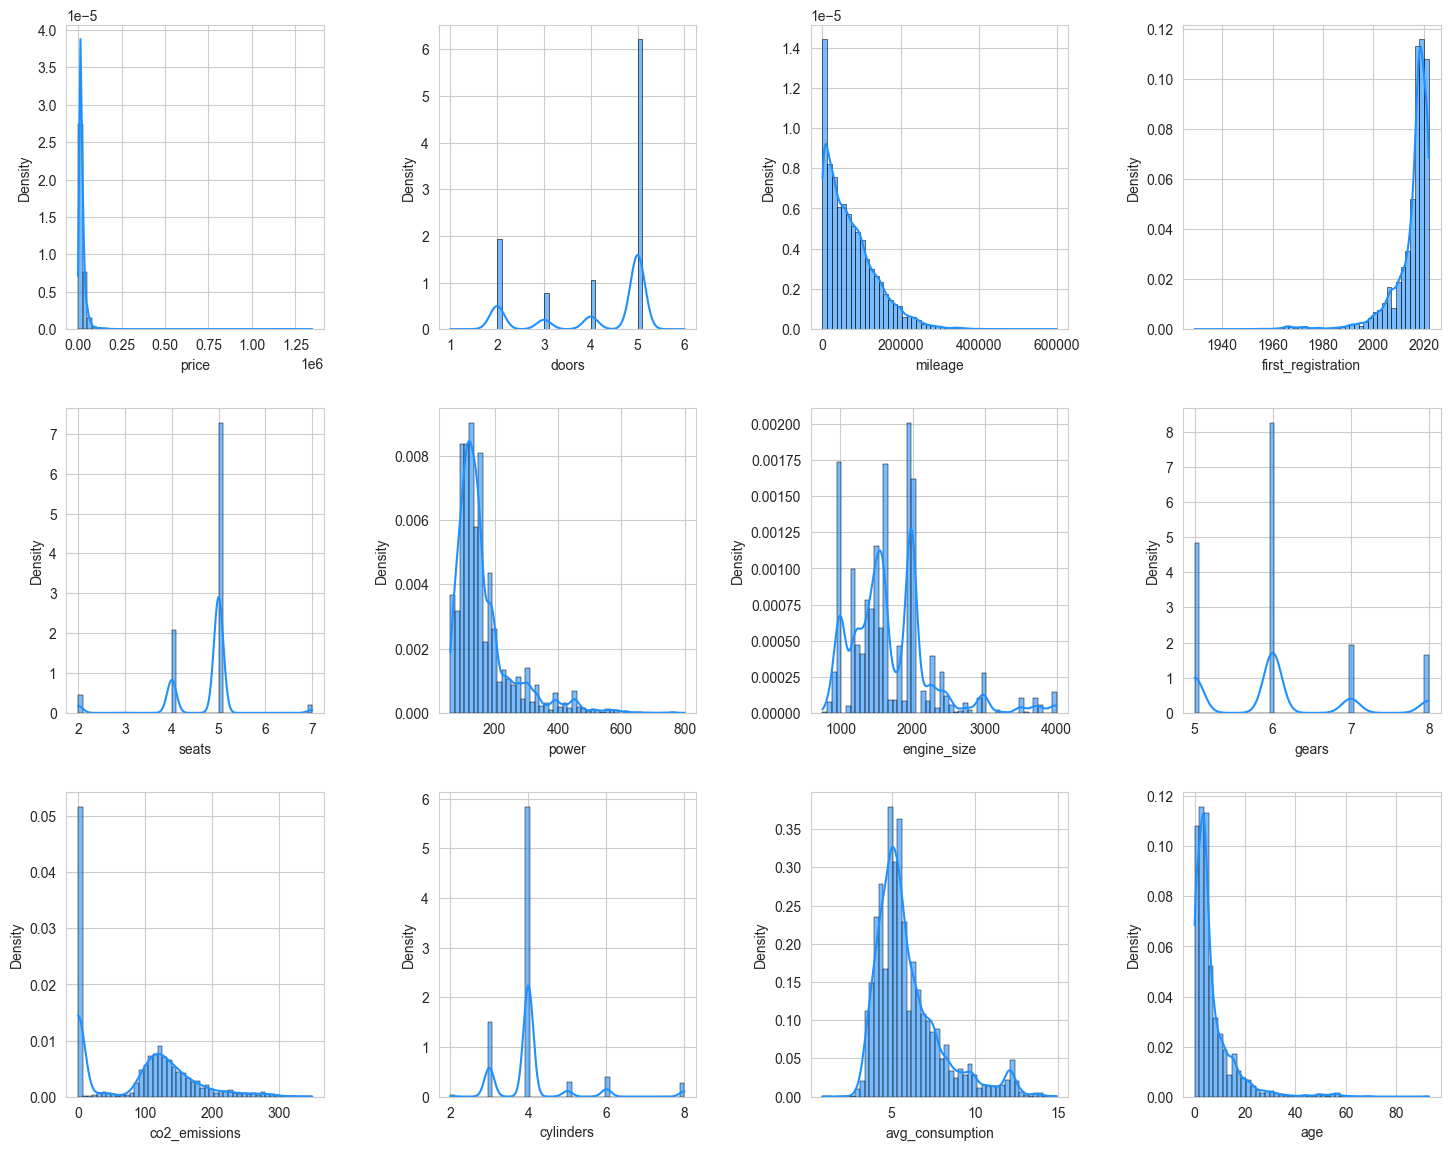

In [127]:
fig = plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, start=1):
    ax = plt.subplot(int(np.ceil(len(numeric_cols)/4)), 4, i)
    sns.histplot(x=col, data=df, kde=True, stat='density', ax=ax,
        color='dodgerblue', edgecolor = 'k', alpha=.6, bins=int(50),
    )
    plt.tight_layout(pad=2.5)

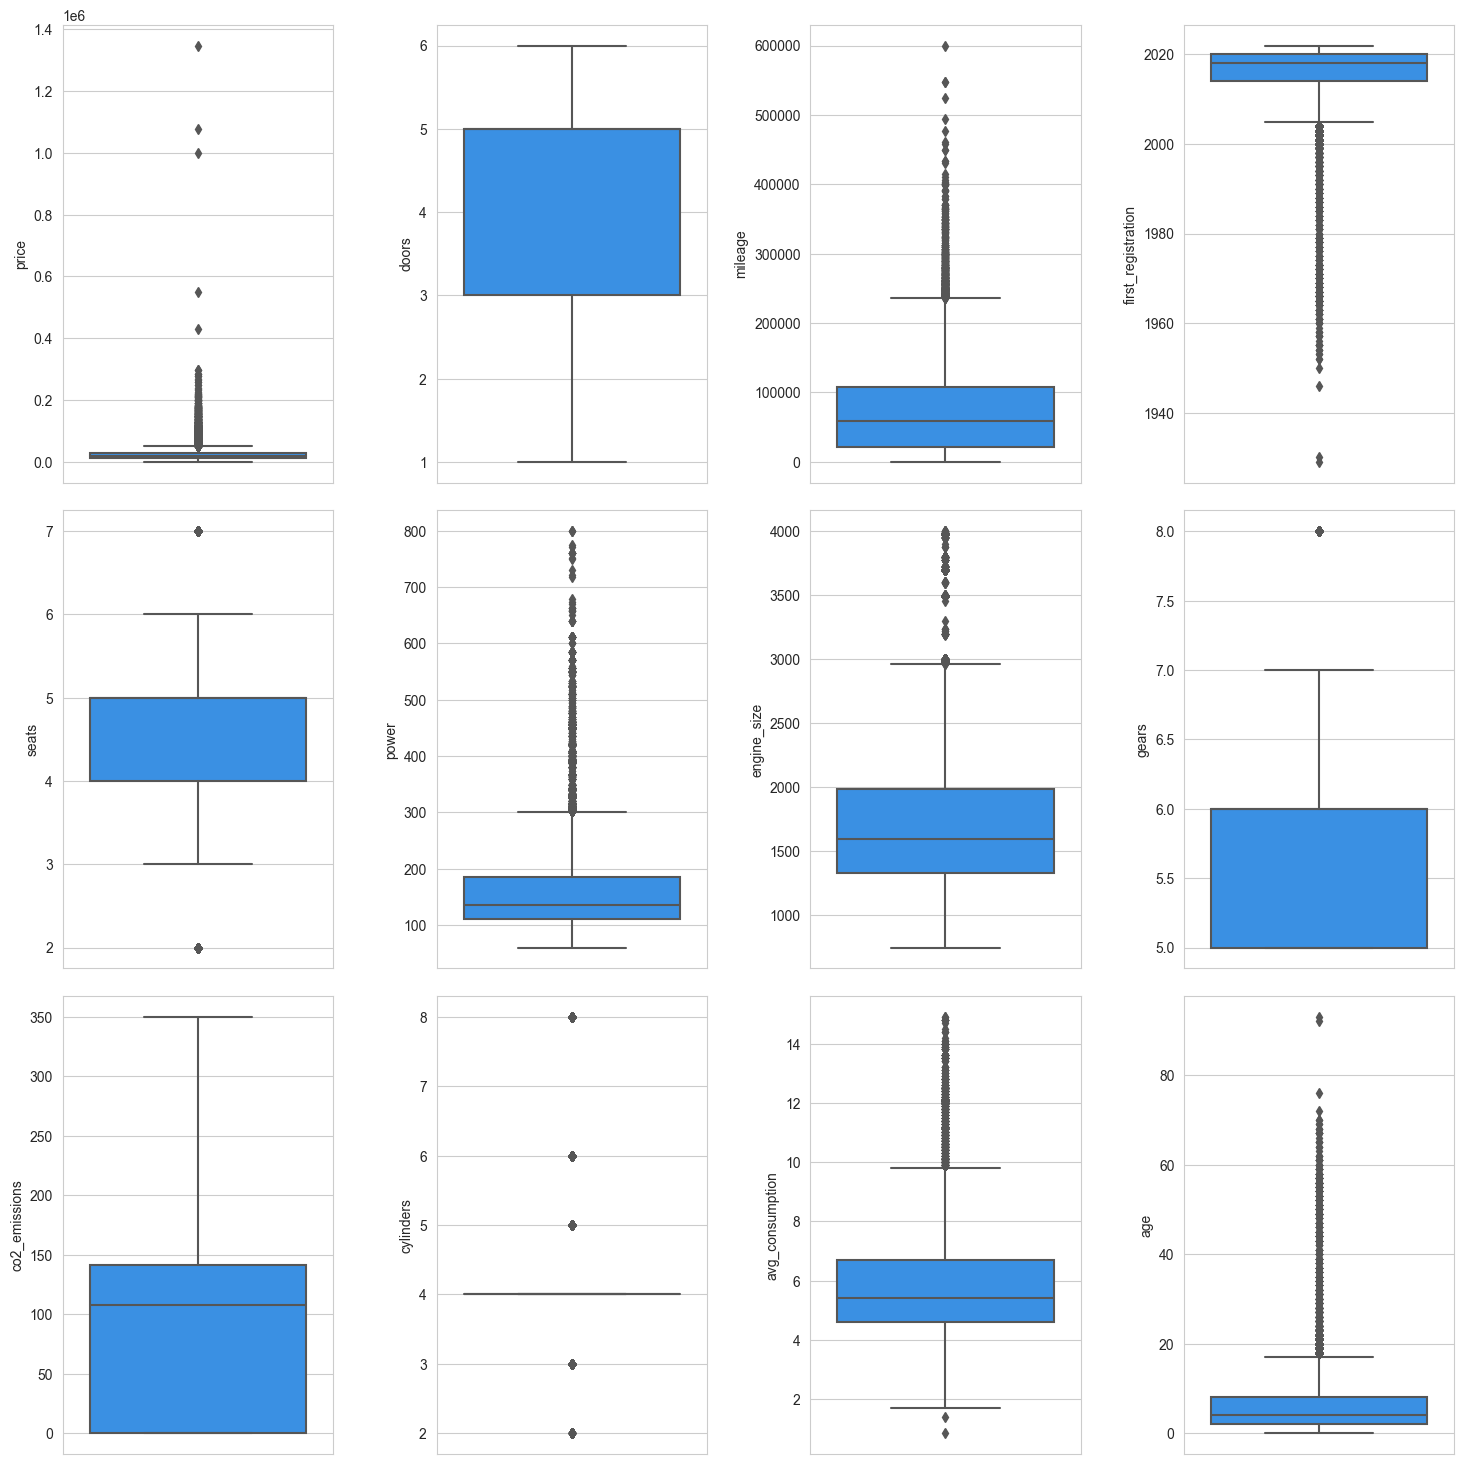

In [128]:
fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(int(np.ceil(len(numeric_cols)/4)), 4, i)
    sns.boxplot(y=col, data=df, whis=1.5, color='dodgerblue')
    plt.tight_layout(pad=2)

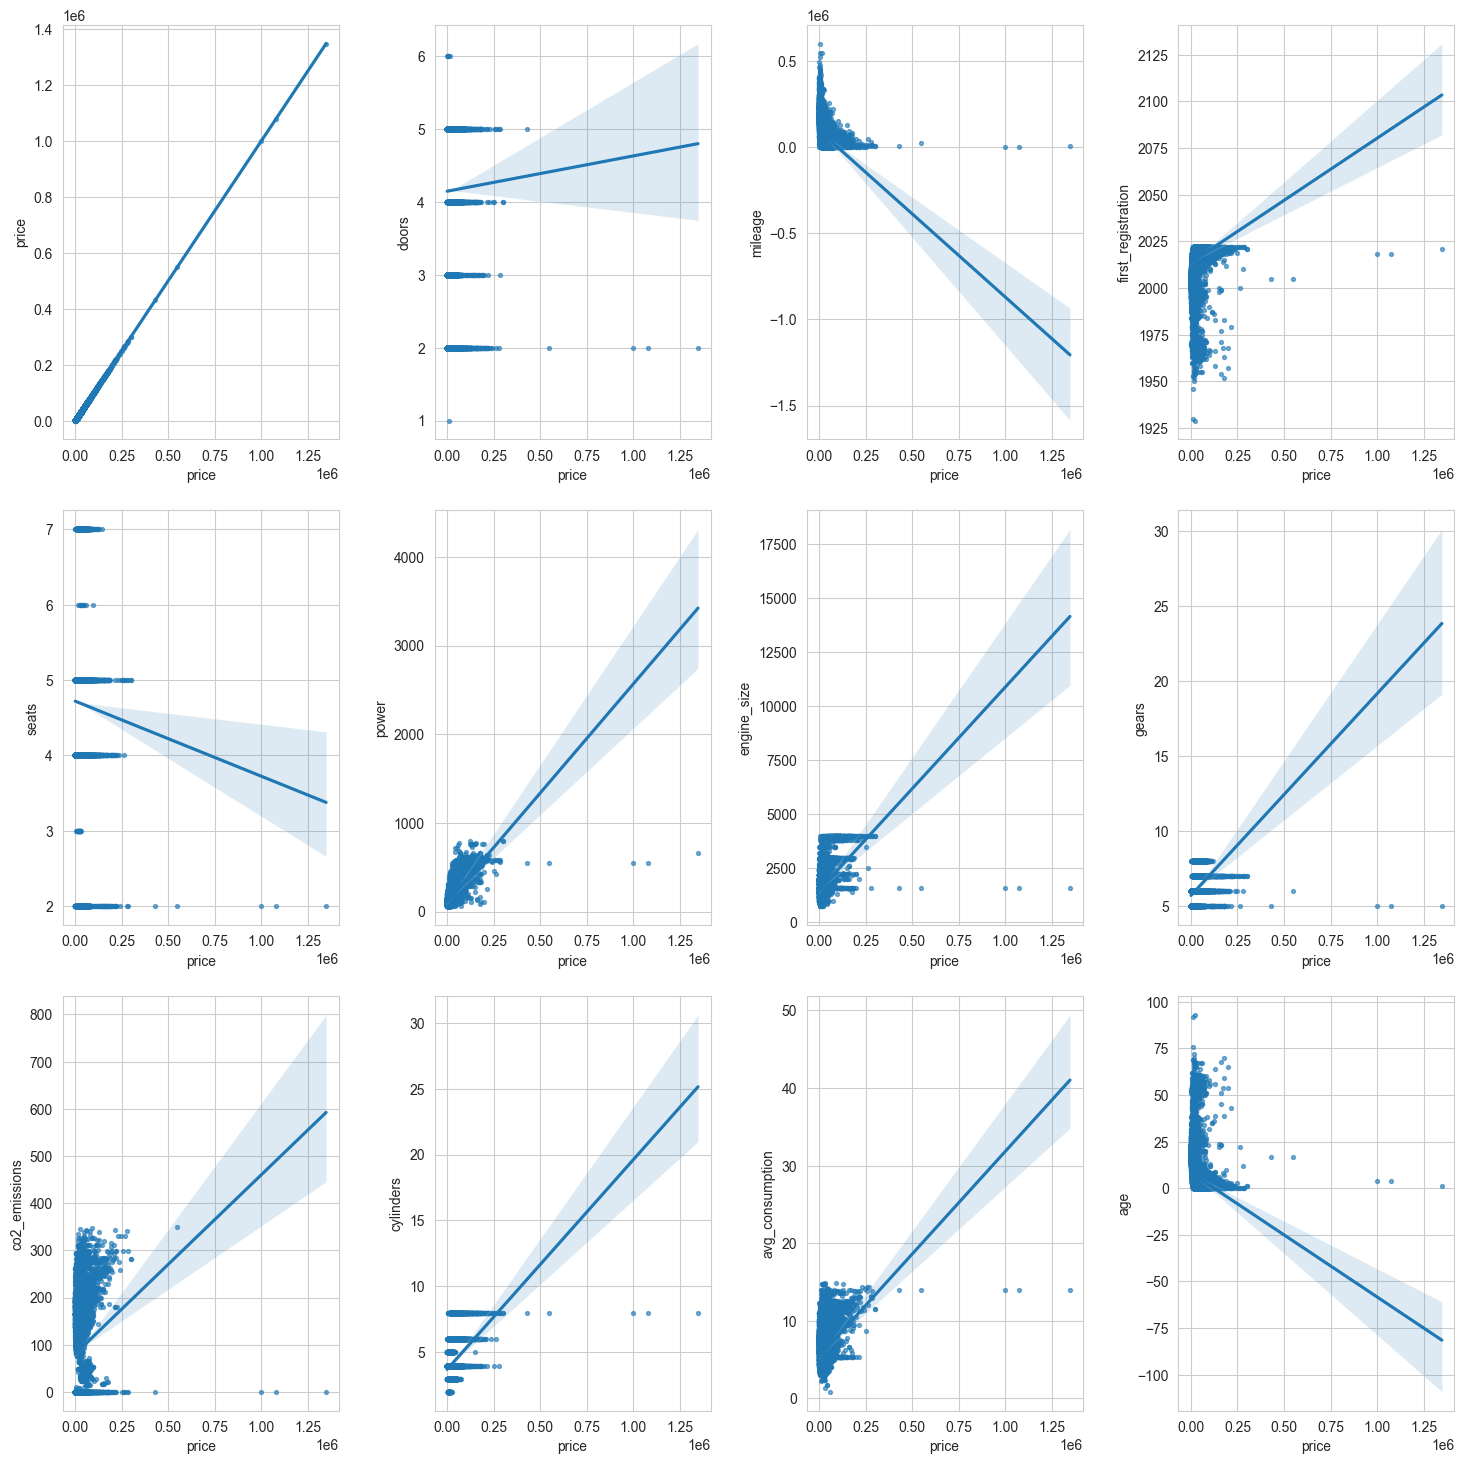

In [129]:
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(int(np.ceil(len(numeric_cols)/4)), 4, i)
    sns.regplot(x='price', y=col, data=df, scatter_kws={"s":8, 'alpha':0.6})
    plt.tight_layout(pad=2)

In [130]:
object_cols

Index(['make_model', 'body_type', 'type', 'gearbox', 'fuel_type', 'seller',
       'co2_emissions', 'drivetrain', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'upholstery'],
      dtype='object')

In [131]:
## categorical columns less than 30 unique values.

categorical_features = [i for i in df.select_dtypes('O').columns if df[i].nunique()<30]
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 0 to 28629
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   body_type   27749 non-null  object
 1   type        27749 non-null  object
 2   gearbox     27749 non-null  object
 3   fuel_type   27749 non-null  object
 4   seller      27749 non-null  object
 5   drivetrain  27749 non-null  object
 6   upholstery  27749 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


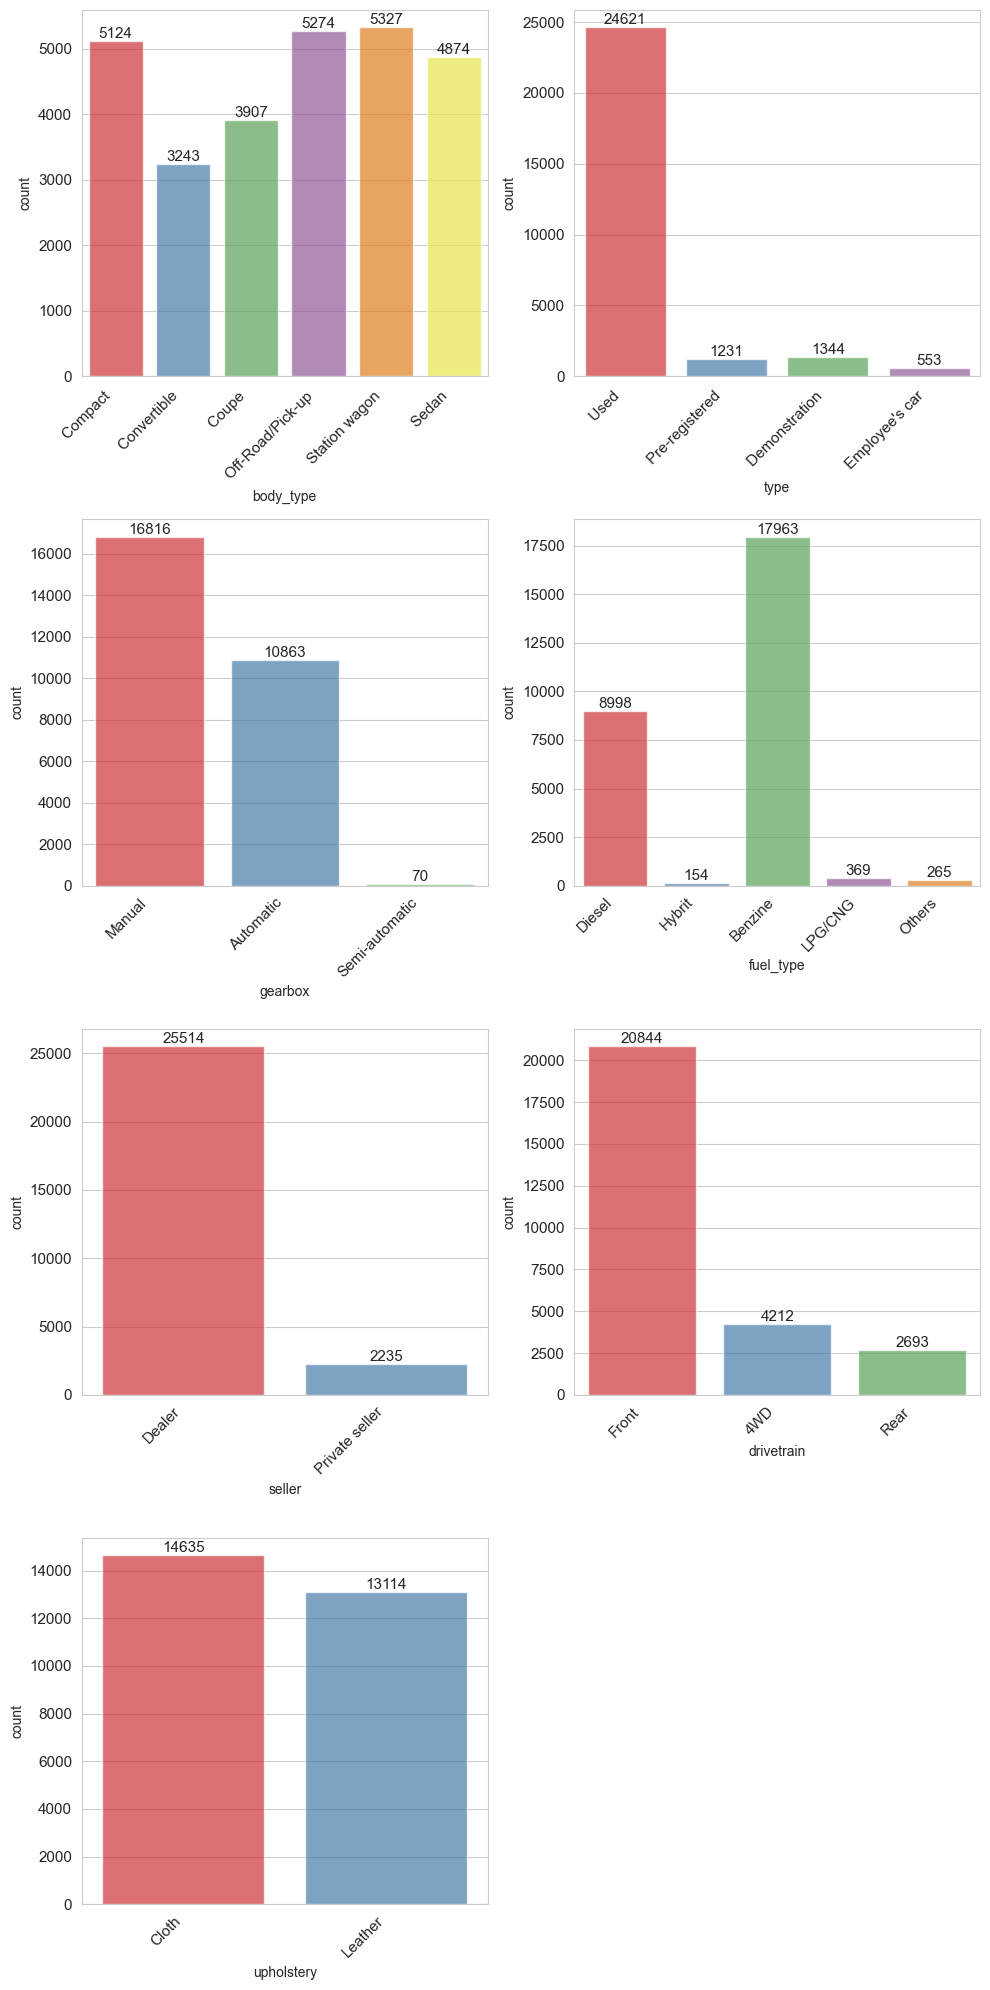

In [132]:
fig = plt.figure(figsize=(10, 20))
for i, col in enumerate(categorical_features, start=1):
    plt.subplot(int(np.ceil(len(categorical_features)/2)), 2, i)
    g = sns.countplot(x=df[col], alpha=0.7, data=df, palette="Set1")
    g.bar_label(g.containers[0], fontsize=11)
#     g.tick_params(axis='x', rotation=45)
#     g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()

## Export dataframe to csv file (without dummy)

In [133]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27749 entries, 0 to 28629
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           27749 non-null  object 
 1   price                27749 non-null  float64
 2   body_type            27749 non-null  object 
 3   type                 27749 non-null  object 
 4   doors                27749 non-null  float64
 5   mileage              27749 non-null  float64
 6   first_registration   27749 non-null  float64
 7   gearbox              27749 non-null  object 
 8   fuel_type            27749 non-null  object 
 9   seller               27749 non-null  object 
 10  seats                27749 non-null  float64
 11  power                27749 non-null  float64
 12  engine_size          27749 non-null  float64
 13  gears                27749 non-null  float64
 14  co2_emissions        27749 non-null  float64
 15  drivetrain           27749 non-null 

In [135]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [136]:
df.drop(["comfort_convenience", "entertainment_media", "extras", "safety_security"], axis=1, inplace=True)

In [137]:
df.shape

(27749, 281)

In [138]:
df_final = pd.get_dummies(df, drop_first=True)

In [139]:
df_final.shape

(27749, 865)

In [140]:
df_final.head().T

,0,1,2,3,4
price,16950.000,80900.000,69900.000,46990.000,16800.000
doors,5.000,4.000,5.000,5.000,5.000
mileage,120200.000,5000.000,18900.000,18995.000,197000.000
first_registration,2016.000,2022.000,2020.000,2020.000,2015.000
seats,5.000,5.000,5.000,5.000,5.000
power,102.000,292.000,421.000,306.000,136.000
engine_size,1595.000,1598.000,1991.000,1991.000,2143.000
gears,5.000,6.000,8.000,7.000,7.000
co2_emissions,0.000,0.000,0.000,0.000,0.000
cylinders,4.000,4.000,4.000,4.000,4.000


## Export dataframe to csv file (dummy)

In [141]:
df_final.to_csv("final_scout_dummy.csv", index=False)